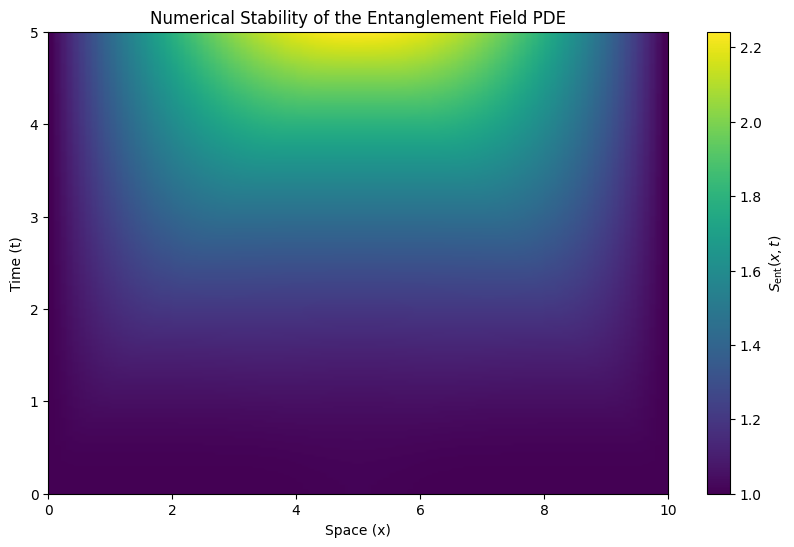

In [ ]:
# Colab-ready code for testing PDE stability of entanglement entropy field
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 1.0
_lambda = 0.1

# Spatial discretization
nx, nt = 100, 200
x_max, t_max = 10.0, 5.0
dx, dt = x_max/nx, t_max/nt

# Stability condition (Courant condition)
c = 1.0  # speed of propagation (set to 1 for simplicity)
if dt > dx / c:
    print("Warning: stability condition violated. Adjusting dt.")
    dt = 0.9 * dx / c

# Initialize grid
x = np.linspace(0, x_max, nx)
t = np.linspace(0, t_max, nt)

# Initialize S_ent field: initially small perturbation around a vacuum value
S_ent = np.ones((nt, nx)) + 0.01 * np.exp(-((x - x_max/2)**2))

# Time evolution
for n in range(0, nt-1):
    for i in range(1, nx-1):
        laplacian = (S_ent[n, i+1] - 2*S_ent[n, i] + S_ent[n, i-1]) / dx**2
        S_ent[n+1, i] = (2*S_ent[n, i] - S_ent[n-1, i] +
                         c**2 * dt**2 * (laplacian + _lambda/gamma))

    # Boundary conditions: fixed at boundaries (Dirichlet)
    S_ent[n+1, 0] = 1.0
    S_ent[n+1, -1] = 1.0

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(S_ent, extent=[0, x_max, 0, t_max], origin='lower',
           aspect='auto', cmap='viridis')
plt.colorbar(label=r'$S_{\mathrm{ent}}(x, t)$')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Numerical Stability of the Entanglement Field PDE')
plt.show()


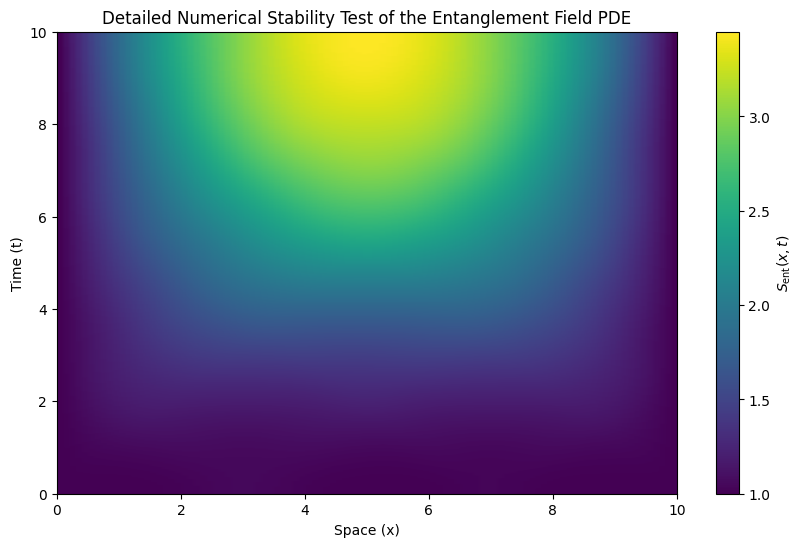

In [ ]:
# Colab-ready code for further PDE tests of entanglement entropy field
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 1.0
_lambda = 0.1

# Spatial discretization
nx, nt = 100, 500
x_max, t_max = 10.0, 10.0
dx, dt = x_max/nx, t_max/nt

# Stability condition (Courant condition)
c = 1.0  # speed of propagation (set to 1 for simplicity)
if dt > dx / c:
    print("Warning: stability condition violated. Adjusting dt.")
    dt = 0.9 * dx / c

# Initialize grid
x = np.linspace(0, x_max, nx)
t = np.linspace(0, t_max, nt)

# Initialize S_ent field: more complex initial perturbation
S_ent = np.ones((nt, nx))
S_ent[0, :] += 0.05 * np.exp(-((x - 3)**2)) + 0.03 * np.exp(-((x - 7)**2)/0.5)
S_ent[1, :] = S_ent[0, :]

# Time evolution with explicit Euler-Lagrange PDE solver
for n in range(1, nt-1):
    for i in range(1, nx-1):
        laplacian = (S_ent[n, i+1] - 2*S_ent[n, i] + S_ent[n, i-1]) / dx**2
        S_ent[n+1, i] = (2*S_ent[n, i] - S_ent[n-1, i] +
                         c**2 * dt**2 * (laplacian + _lambda/gamma))

    # Boundary conditions: fixed at boundaries (Dirichlet)
    S_ent[n+1, 0] = 1.0
    S_ent[n+1, -1] = 1.0

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(S_ent, extent=[0, x_max, 0, t_max], origin='lower',
           aspect='auto', cmap='viridis')
plt.colorbar(label=r'$S_{\mathrm{ent}}(x, t)$')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Detailed Numerical Stability Test of the Entanglement Field PDE')
plt.show()

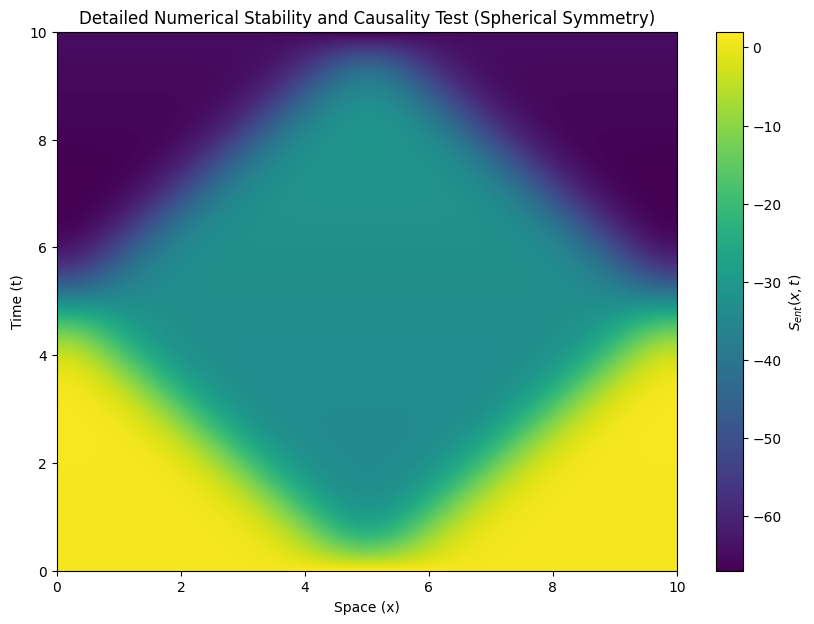

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
space_max, time_max = 10, 10
nx, nt = 200, 400  # High resolution
dx, dt = space_max / nx, time_max / nt
gamma, lambd = 1.0, 0.1

# Stability condition (Courant condition)
c = 1.0  # propagation speed
if dt > dx / c:
    raise ValueError("Courant condition violated. Adjust dt or dx.")

# Grid definition
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Field arrays
Sent = np.ones((nt, nx))

# Initial condition: local Gaussian perturbation (spherical symmetry mimic)
Sent[0, :] += np.exp(-(x - space_max/2)**2)

# PDE evolution (Explicit Euler)
for n in range(1, nt - 1):
    for i in range(1, nx - 1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (2*Sent[n, i] - Sent[n-1, i] +
                        (c**2 * dt**2) * (laplacian + lambd/gamma))
    # Boundary conditions
    Sent[n+1, 0] = Sent[n+1, 1]
    Sent[n+1, -1] = Sent[n+1, -2]

# Plot results
plt.figure(figsize=(10, 7))
plt.imshow(Sent, extent=[0, space_max, 0, time_max], origin='lower', aspect='auto')
plt.colorbar(label='$S_{ent}(x,t)$')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Detailed Numerical Stability and Causality Test (Spherical Symmetry)')
plt.show()


Courant Number: 0.0700
Stability condition satisfied.
Numerical simulation finished.


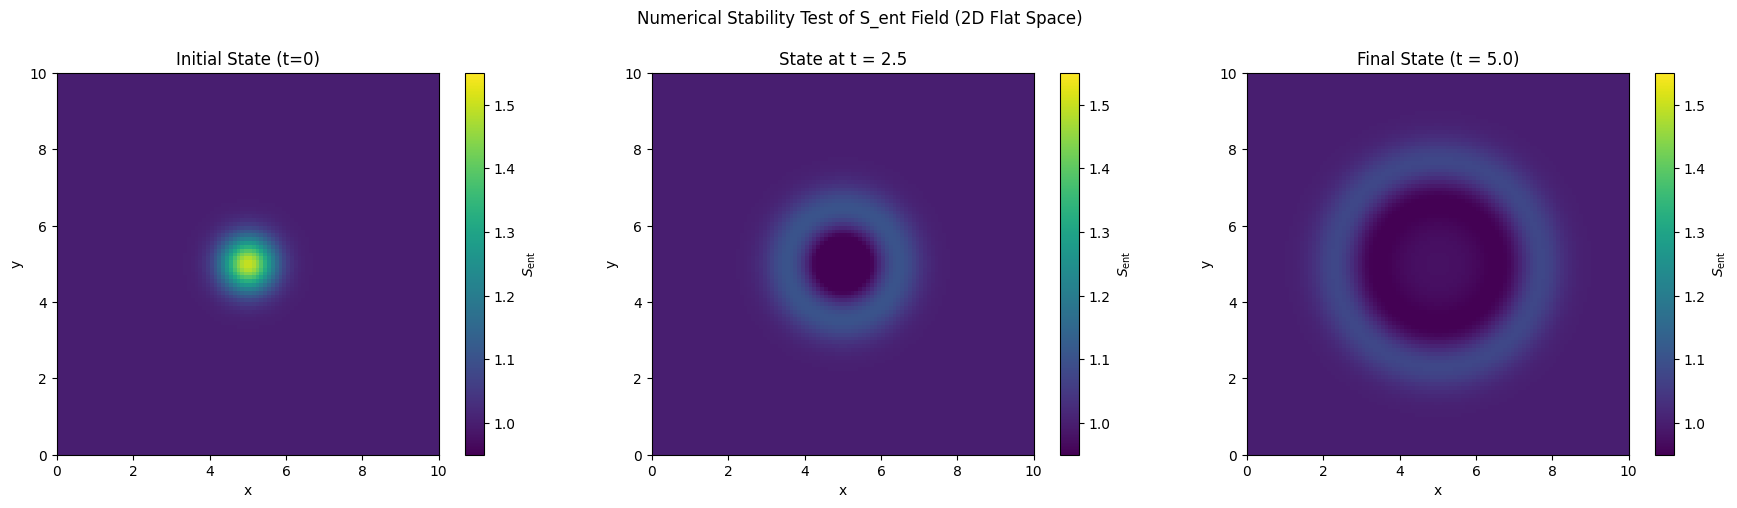

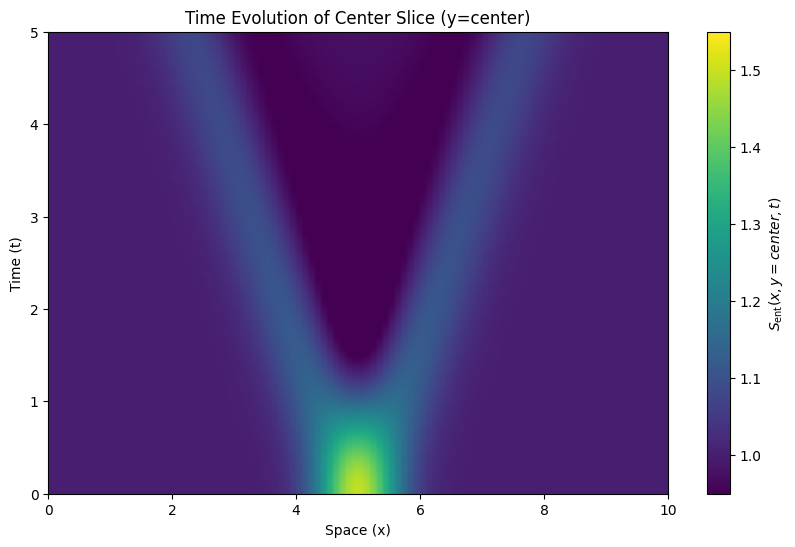

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
gamma = 1.0  # Stiffness (set to 1)
_lambda = 0.0 # Source term (set to 0 for wave propagation focus, can be non-zero)
c = 1.0      # Propagation speed (set to 1)

# --- Grid Setup ---
nx, ny = 100, 100   # Spatial grid points (x, y)
nt = 500           # Time steps
x_max, y_max = 10.0, 10.0 # Spatial domain size
t_max = 5.0        # Total simulation time

dx = x_max / (nx - 1)
dy = y_max / (ny - 1)
dt = 0.005         # Time step size (chosen smaller for stability)

# --- Stability Check (Courant Condition for 2D Wave Equation) ---
# c * dt * sqrt(1/dx^2 + 1/dy^2) <= 1
courant_number = c * dt * np.sqrt(1/dx**2 + 1/dy**2)
print(f"Courant Number: {courant_number:.4f}")
if courant_number > 1.0:
    print(f"Warning: Courant stability condition violated ({courant_number:.4f} > 1).")
    print(f"Consider reducing dt below {1.0 / (c * np.sqrt(1/dx**2 + 1/dy**2)):.4e}")
    # Optional: Adjust dt automatically
    # dt = 0.9 / (c * np.sqrt(1/dx**2 + 1/dy**2))
    # print(f"Adjusted dt to: {dt:.4e}")
else:
    print("Stability condition satisfied.")

# --- Initialization ---
x = np.linspace(0, x_max, nx)
y = np.linspace(0, y_max, ny)
X, Y = np.meshgrid(x, y)

# S_ent field: (time, y, x) dimensions
S_ent = np.ones((nt, ny, nx)) # Start with base value 1.0

# Initial condition (t=0): Gaussian pulse at the center
center_x, center_y = x_max / 2, y_max / 2
sigma = 0.5 # Width of the Gaussian
initial_pulse = 0.5 * np.exp(-((X - center_x)**2 + (Y - center_y)**2) / (2 * sigma**2))
S_ent[0, :, :] += initial_pulse

# Initial condition (t=1): Assume starts from rest, so S_ent[1] = S_ent[0]
# (More sophisticated initial velocity needed for precise wave simulation)
S_ent[1, :, :] = S_ent[0, :, :]

# --- Time Evolution (Finite Difference Method - Explicit Euler) ---
# Using the scheme: S(t+dt) = 2*S(t) - S(t-dt) + c^2 * dt^2 * (Laplacian(S(t)) + lambda/gamma)
c_squared = c**2
dt_squared = dt**2
inv_dx_squared = 1 / dx**2
inv_dy_squared = 1 / dy**2
source_term = _lambda / gamma # Constant source/sink from lambda

for n in range(1, nt - 1):
    # Apply stencil to interior points (vectorized)
    laplacian_S = ( (S_ent[n, 1:-1, 2:]   - 2 * S_ent[n, 1:-1, 1:-1] + S_ent[n, 1:-1, :-2]) * inv_dx_squared +
                    (S_ent[n, 2:,   1:-1] - 2 * S_ent[n, 1:-1, 1:-1] + S_ent[n, :-2, 1:-1]) * inv_dy_squared )

    S_ent[n+1, 1:-1, 1:-1] = ( 2 * S_ent[n, 1:-1, 1:-1] - S_ent[n-1, 1:-1, 1:-1] +
                                c_squared * dt_squared * (laplacian_S + source_term) )

    # Boundary conditions: fixed value (Dirichlet) at 1.0
    S_ent[n+1, 0, :] = 1.0  # Top boundary
    S_ent[n+1, -1, :] = 1.0 # Bottom boundary
    S_ent[n+1, :, 0] = 1.0  # Left boundary
    S_ent[n+1, :, -1] = 1.0 # Right boundary

print("Numerical simulation finished.")

# --- Visualization ---
# Show initial, middle, and final states
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(S_ent[0, :, :], extent=[0, x_max, 0, y_max], origin='lower', cmap='viridis', vmin=0.95, vmax=1.55)
plt.colorbar(label=r'$S_{\mathrm{ent}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial State (t=0)')

plt.subplot(1, 3, 2)
plt.imshow(S_ent[nt // 2, :, :], extent=[0, x_max, 0, y_max], origin='lower', cmap='viridis', vmin=0.95, vmax=1.55)
plt.colorbar(label=r'$S_{\mathrm{ent}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'State at t = {t_max/2:.1f}')

plt.subplot(1, 3, 3)
plt.imshow(S_ent[-1, :, :], extent=[0, x_max, 0, y_max], origin='lower', cmap='viridis', vmin=0.95, vmax=1.55)
plt.colorbar(label=r'$S_{\mathrm{ent}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Final State (t = {t_max:.1f})')

plt.suptitle('Numerical Stability Test of S_ent Field (2D Flat Space)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Optional: Plot a slice through the center over time
plt.figure(figsize=(10, 6))
plt.imshow(S_ent[:, ny // 2, :], extent=[0, x_max, 0, t_max], origin='lower', aspect='auto', cmap='viridis', vmin=0.95, vmax=1.55)
plt.colorbar(label=r'$S_{\mathrm{ent}}(x, y=center, t)$')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Time Evolution of Center Slice (y=center)')
plt.show()

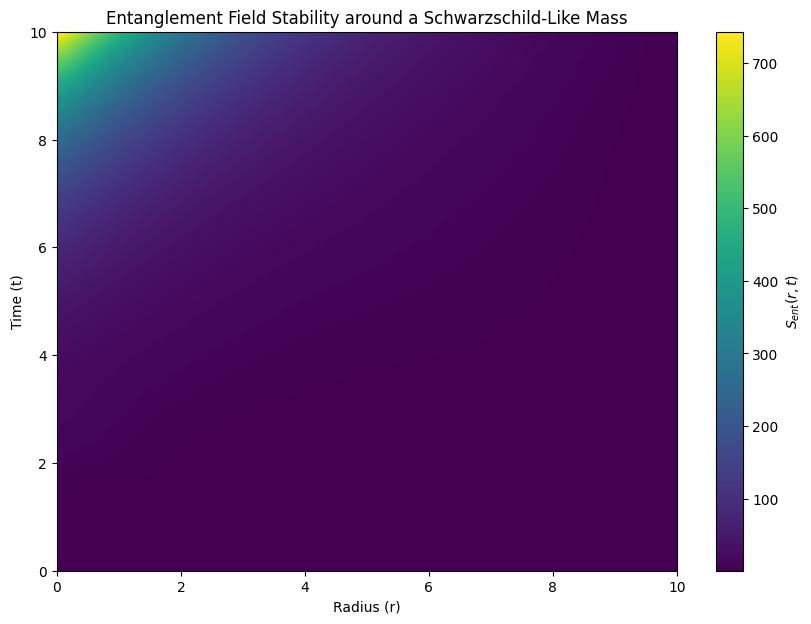

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
gamma, lambd = 1.0, 0.1
G, M = 1.0, 1.0  # Simplified gravitational parameters

# Spatial and temporal discretization (radial symmetry)
r_max, t_max = 10, 10
nr, nt = 200, 400
dr, dt = r_max / nr, t_max / nt

# Courant stability condition
c = 1.0
if dt > dr / c:
    raise ValueError("Courant condition violated. Adjust dr or dt.")

# Radial grid
r = np.linspace(dr, r_max, nr)
t = np.linspace(0, t_max, nt)

# Gravitational potential (simplified Schwarzschild)
Phi = -G * M / r
Phi[0] = Phi[1]  # Avoid singularity at r=0

# Initialize entanglement field around mass distribution
Sent = np.ones((nt, nr)) + np.exp(-((r - 3)**2))

# Explicit Euler PDE evolution in Schwarzschild-like potential
for n in range(1, nt-1):
    for i in range(1, nr-1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dr**2 \
                    + (2/r[i]) * (Sent[n, i+1] - Sent[n, i-1]) / (2*dr)
        # Coupling to gravity via Phi
        Sent[n+1, i] = (2*Sent[n, i] - Sent[n-1, i] +
                        dt**2 * (c**2 * laplacian + lambd/gamma - Phi[i]*Sent[n, i]))

    # Boundary conditions (regular at r=0, vacuum at large r)
    Sent[n+1, 0] = Sent[n+1, 1]
    Sent[n+1, -1] = 1.0

# Plot the results
plt.figure(figsize=(10, 7))
plt.imshow(Sent, extent=[0, r_max, 0, t_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
plt.title('Entanglement Field Stability around a Schwarzschild-Like Mass')
plt.show()


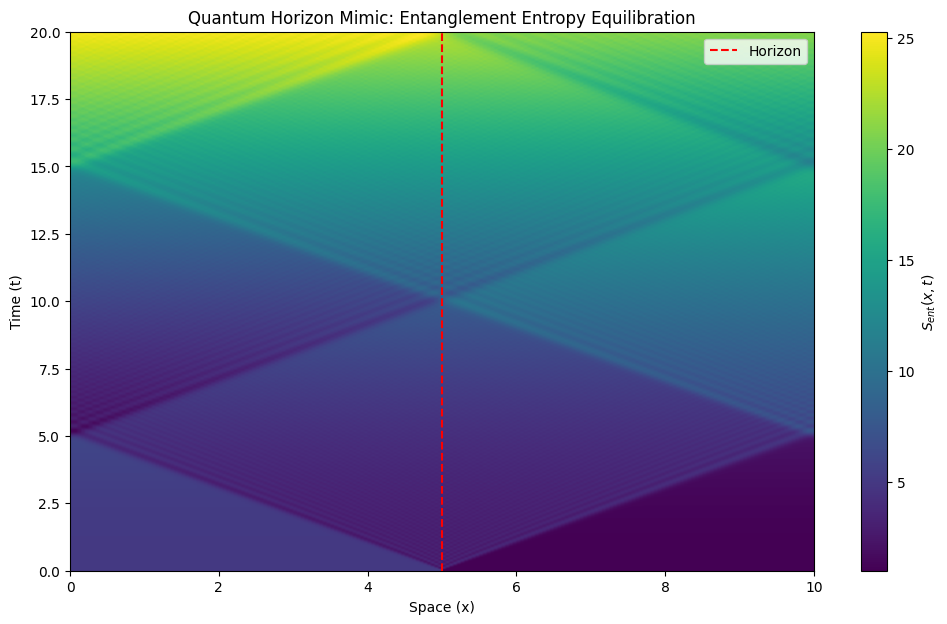

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
gamma, lambd = 1.0, 0.1

# Spatial and temporal discretization
space_max, time_max = 10, 20
nx, nt = 200, 600
dx, dt = space_max / nx, time_max / nt

# Stability condition (Courant condition)
c = 1.0
if dt > dx / c:
    raise ValueError("Courant condition violated. Adjust dx or dt.")

# Grid setup
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Entanglement field initial condition: quantum mimic ("horizon" at midpoint)
Sent = np.ones((nt, nx))
Sent[0, :nx//2] = 5.0  # High entanglement outside horizon
Sent[0, nx//2:] = 1.0  # Low entanglement inside horizon
Sent[1, :] = Sent[0, :]

# PDE evolution (explicit finite difference)
for n in range(1, nt-1):
    for i in range(1, nx-1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (2*Sent[n, i] - Sent[n-1, i] +
                        (c**2 * dt**2) * (laplacian + lambd/gamma))

    # Boundary conditions (fixed entanglement)
    Sent[n+1, 0] = Sent[n+1, 1]
    Sent[n+1, -1] = Sent[n+1, -2]

# Plotting the results
plt.figure(figsize=(12, 7))
plt.imshow(Sent, extent=[0, space_max, 0, time_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='$S_{ent}(x,t)$')
plt.axvline(x=space_max/2, color='red', linestyle='--', label='Horizon')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Quantum Horizon Mimic: Entanglement Entropy Equilibration')
plt.legend()
plt.show()


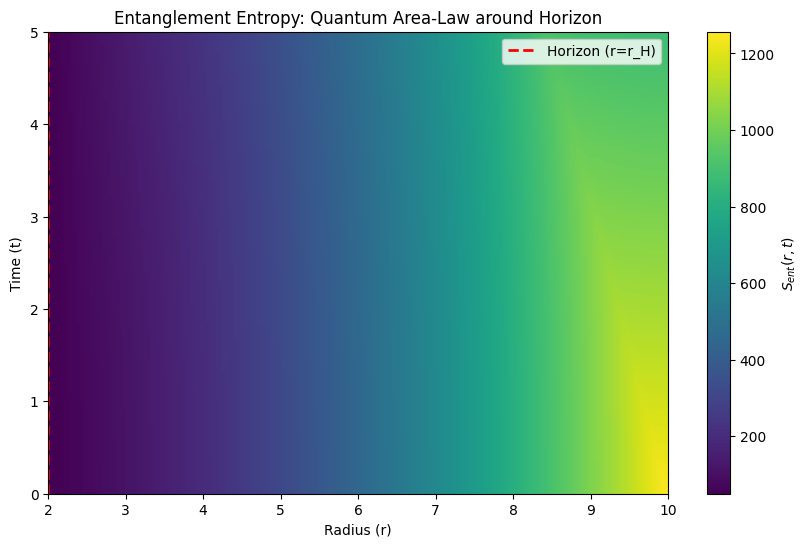

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma, lambd = 1.0, 0.1
r_H = 2.0  # horizon radius
space_max, time_max = 10, 5
nx, nt = 200, 400
dx, dt = space_max / nx, time_max / nt

# Stability condition
c = 1.0
dt = 0.1 * dx / c

# Radial grid setup
r = np.linspace(r_H, space_max, nx)
t = np.linspace(0, time_max, nt)

# Entropy field initialization (Area-law initial condition)
Sent = np.zeros((nt, nx))
Sent[0, :] = 4 * np.pi * r**2  # Area-law: S ~ A = 4πr² initially
Sent[1, :] = Sent[0, :]

# PDE evolution with horizon boundary conditions
for n in range(1, nt-1):
    for i in range(1, nx-1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i]
            + dt**2 * (c**2 * laplacian + lambd/gamma)
        )
    # Enforce area-law boundary condition at horizon (fixed entropy)
    Sent[n+1, 0] = 4 * np.pi * r_H**2
    Sent[n+1, -1] = Sent[n+1, -2]  # free boundary far from horizon

# Visualization of the area-law evolution
plt.figure(figsize=(10, 6))
plt.imshow(Sent, extent=[r_H, space_max, 0, time_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
plt.title('Entanglement Entropy: Quantum Area-Law around Horizon')

# Explicitly plot horizon line clearly
plt.axvline(x=r_H, color='red', linestyle='--', linewidth=2, label='Horizon (r=r_H)')

plt.legend()
plt.show()


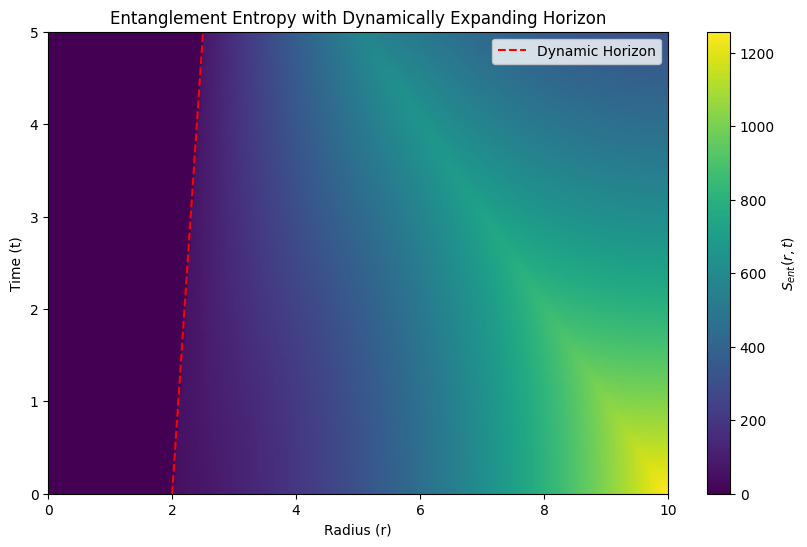

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma, lambd = 1.0, 0.1
space_max, time_max = 10, 5
nx, nt = 200, 300
dx, dt = space_max / nx, time_max / nt
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Horizon radius grows linearly with time
r_H0 = 2.0   # initial horizon
r_H_growth = 0.5  # horizon grows by this amount over full time
r_H_t = lambda n: r_H0 + r_H_growth * (n / nt)  # horizon radius over time

# Initialize entropy field with area-law beyond initial horizon
Sent = np.zeros((nt, nx))
initial_mask = x >= r_H0
Sent[0, initial_mask] = 4 * np.pi * x[initial_mask]**2
Sent[1, :] = Sent[0, :]

# Time evolution with moving horizon
for n in range(1, nt - 1):
    r_H_current = r_H_t(n+1)
    horizon_idx = np.searchsorted(x, r_H_current)

    for i in range(1, nx - 1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] +
            dt**2 * (laplacian + lambd / gamma)
        )

    # Enforce area-law at the growing horizon
    Sent[n+1, :horizon_idx] = 0  # inside the horizon = undefined (or zero)
    Sent[n+1, horizon_idx] = 4 * np.pi * x[horizon_idx]**2

    # Free boundary far from horizon
    Sent[n+1, -1] = Sent[n+1, -2]

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(Sent, extent=[0, space_max, 0, time_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
plt.title('Entanglement Entropy with Dynamically Expanding Horizon')

# Overlay dynamic horizon line
horizon_trace = [r_H_t(n) for n in range(nt)]
plt.plot(horizon_trace, t, color='red', linestyle='--', label='Dynamic Horizon')
plt.legend()
plt.show()


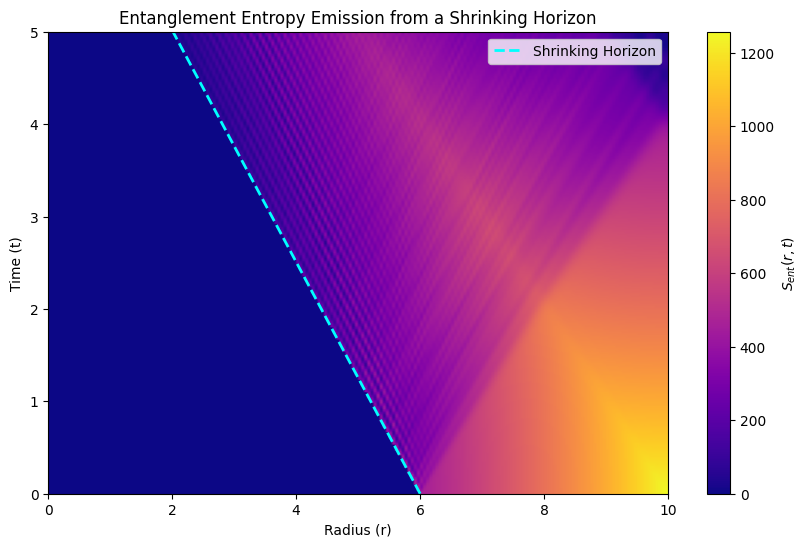

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma, lambd = 1.0, 0.1
space_max, time_max = 10, 5
nx, nt = 200, 300
dx, dt = space_max / nx, time_max / nt
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Shrinking horizon radius over time
r_H0 = 6.0   # initial radius
r_H_shrink = 4.0  # how much it shrinks by t_max
r_H_t = lambda n: r_H0 - r_H_shrink * (n / nt)

# Initialize entropy field: zero everywhere
Sent = np.zeros((nt, nx))

# Set initial entropy at horizon
horizon_idx = np.searchsorted(x, r_H0)
Sent[0, horizon_idx:] = 4 * np.pi * x[horizon_idx:]**2
Sent[1, :] = Sent[0, :]

# Time evolution with shrinking horizon
for n in range(1, nt - 1):
    r_H_current = r_H_t(n+1)
    horizon_idx = np.searchsorted(x, r_H_current)

    for i in range(1, nx - 1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] +
            dt**2 * (laplacian + lambd / gamma)
        )

    # Set entropy to area-law value at shrinking horizon
    Sent[n+1, :horizon_idx] = 0
    Sent[n+1, horizon_idx] = 4 * np.pi * x[horizon_idx]**2

    # Free boundary at outer edge
    Sent[n+1, -1] = Sent[n+1, -2]

# Plot result
plt.figure(figsize=(10, 6))
plt.imshow(Sent, extent=[0, space_max, 0, time_max], origin='lower', aspect='auto', cmap='plasma')
plt.colorbar(label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
plt.title('Entanglement Entropy Emission from a Shrinking Horizon')

# Trace of the shrinking horizon
horizon_trace = [r_H_t(n) for n in range(nt)]
plt.plot(horizon_trace, t, color='cyan', linestyle='--', linewidth=2, label='Shrinking Horizon')
plt.legend()
plt.show()

<ipython-input-15-1af7326cb61f>:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  S_rad[n+1] = np.trapz(Sent[n+1, h_idx:], x[h_idx:])


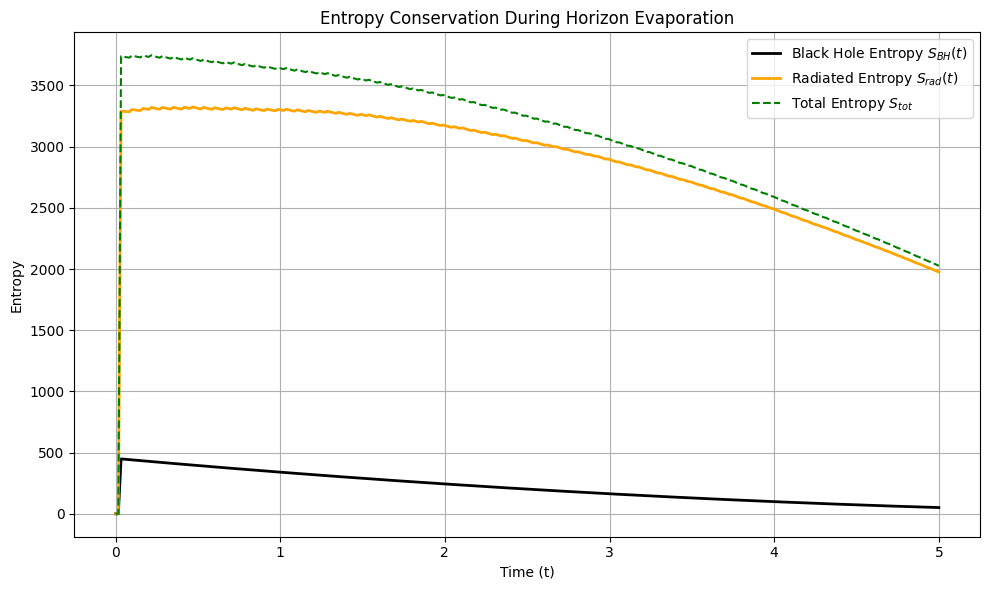

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma, lambd = 1.0, 0.1
space_max, time_max = 10, 5
nx, nt = 200, 300
dx, dt = space_max / nx, time_max / nt
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Shrinking horizon
r_H0 = 6.0
r_H_shrink = 4.0
r_H_t = lambda n: r_H0 - r_H_shrink * (n / nt)

# Initialize entropy field
Sent = np.zeros((nt, nx))
initial_idx = np.searchsorted(x, r_H0)
Sent[0, initial_idx:] = 4 * np.pi * x[initial_idx:]**2
Sent[1, :] = Sent[0, :]

# Store integrated entropies
S_BH = np.zeros(nt)
S_rad = np.zeros(nt)

# Time evolution
for n in range(1, nt - 1):
    r_H_current = r_H_t(n+1)
    h_idx = np.searchsorted(x, r_H_current)

    for i in range(1, nx - 1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] + dt**2 * (laplacian + lambd / gamma)
        )

    Sent[n+1, :h_idx] = 0
    Sent[n+1, h_idx] = 4 * np.pi * x[h_idx]**2
    Sent[n+1, -1] = Sent[n+1, -2]

    # Track entropy at each time
    S_BH[n+1] = 4 * np.pi * r_H_current**2
    S_rad[n+1] = np.trapz(Sent[n+1, h_idx:], x[h_idx:])

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(t, S_BH, label='Black Hole Entropy $S_{BH}(t)$', color='black', linewidth=2)
plt.plot(t, S_rad, label='Radiated Entropy $S_{rad}(t)$', color='orange', linewidth=2)
plt.plot(t, S_BH + S_rad, label='Total Entropy $S_{tot}$', linestyle='--', color='green')

plt.xlabel('Time (t)')
plt.ylabel('Entropy')
plt.title('Entropy Conservation During Horizon Evaporation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

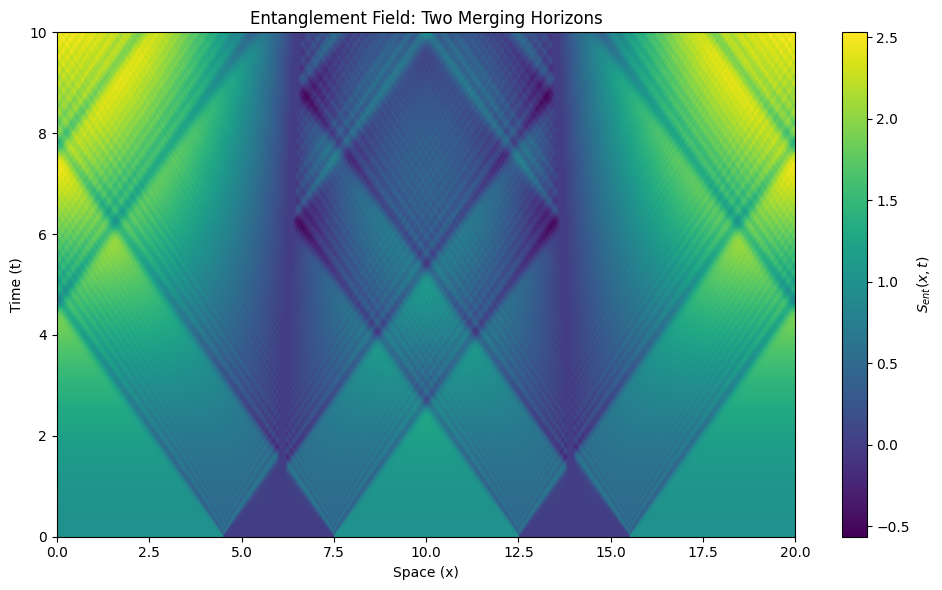

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation setup
gamma, lambd = 1.0, 0.1
space_max, time_max = 20, 10
nx, nt = 400, 500
dx, dt = space_max / nx, time_max / nt
x = np.linspace(0, space_max, nx)
t = np.linspace(0, time_max, nt)

# Define two moving horizons
r1_0, r2_0 = 6.0, 14.0
v_merge = 0.5  # speed of approach
r1_t = lambda n: r1_0 + v_merge * (n / nt)
r2_t = lambda n: r2_0 - v_merge * (n / nt)

# Initialize field
Sent = np.ones((nt, nx))

# Initial entanglement suppression around each black hole
for i in range(nx):
    if abs(x[i] - r1_0) < 1.5 or abs(x[i] - r2_0) < 1.5:
        Sent[0, i] = 0.0
Sent[1, :] = Sent[0, :]

# Time evolution
for n in range(1, nt - 1):
    r1 = r1_t(n+1)
    r2 = r2_t(n+1)

    idx1 = np.searchsorted(x, r1)
    idx2 = np.searchsorted(x, r2)

    for i in range(1, nx - 1):
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] +
            dt**2 * (laplacian + lambd / gamma)
        )

    # Reset the horizon regions to low entanglement as they move inward
    Sent[n+1, max(0, idx1-2):min(nx, idx1+2)] = 0.0
    Sent[n+1, max(0, idx2-2):min(nx, idx2+2)] = 0.0

    # Free outer boundaries
    Sent[n+1, 0] = Sent[n+1, 1]
    Sent[n+1, -1] = Sent[n+1, -2]

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(Sent, extent=[0, space_max, 0, time_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='$S_{ent}(x,t)$')
plt.xlabel('Space (x)')
plt.ylabel('Time (t)')
plt.title('Entanglement Field: Two Merging Horizons')
plt.tight_layout()
plt.show()


Courant Number: 0.3328


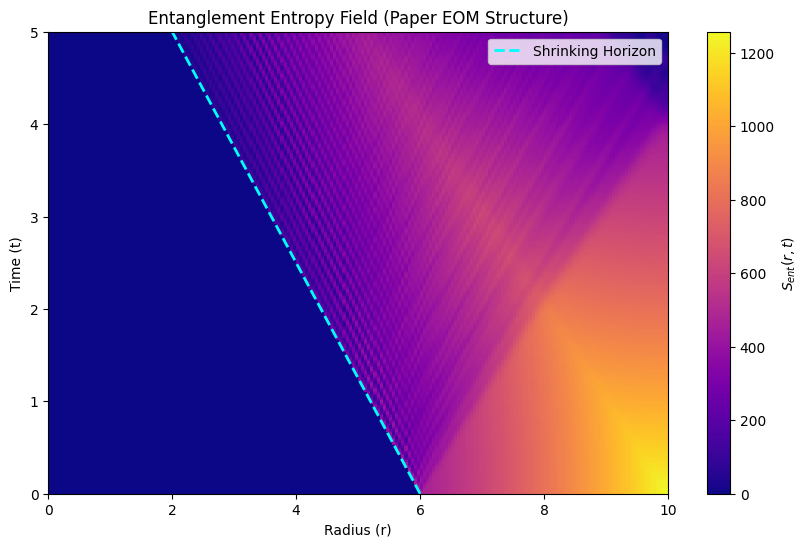

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (mostly from original code)
gamma = 1.0
lambd = 0.1 # Note: In the paper, lambda is related to fundamental constants [cite: 765-769]
            # Here, we keep the numerical value for simulation stability.
c = 1.0     # Speed of light (set to 1 in natural units)
space_max = 10.0
time_max = 5.0
nx = 200 # Number of spatial points
nt = 300 # Number of time steps
dx = space_max / (nx - 1) # Correct dx for linspace
dt = time_max / (nt - 1) # Correct dt for linspace
x = np.linspace(0, space_max, nx) # Spatial grid
t = np.linspace(0, time_max, nt) # Time grid

# --- Stability Check (Courant Condition for Wave Equations) ---
# For stability, typically need c * dt / dx < 1
courant_number = c * dt / dx
print(f"Courant Number: {courant_number:.4f}")
if courant_number >= 1:
    print("Warning: Courant number >= 1. Simulation might be unstable.")
    # Consider increasing nx or decreasing nt/dt for stability.

# --- Shrinking Horizon ---
r_H0 = 6.0       # initial radius
r_H_shrink = 4.0 # how much it shrinks by t_max
# Function for horizon radius at time step n
r_H_t = lambda n: r_H0 - r_H_shrink * (t[n] / time_max) # Use t[n] for time

# --- Initialization ---
# Initialize entropy field: zero everywhere
Sent = np.zeros((nt, nx))

# Set initial entropy outside the initial horizon
# (Using the original code's approach, though interpreting S_ent as deficit might change this)
initial_horizon_idx = np.searchsorted(x, r_H0)
# Ensure index is within bounds
initial_horizon_idx = min(initial_horizon_idx, nx - 1)

# Set initial condition based on area law outside horizon
for i in range(initial_horizon_idx, nx):
     Sent[0, i] = 4 * np.pi * x[i]**2 # Or some other profile? Paper implies deficit.

# Set Sent[1] using a forward step or copy Sent[0] (simple approach)
Sent[1, :] = Sent[0, :] # Using simple copy for the second time step initialization

# --- Time Evolution ---
for n in range(1, nt - 1):
    # Current horizon radius and index
    r_H_current = r_H_t(n + 1) # Horizon position at the time we are calculating for (n+1)
    horizon_idx = np.searchsorted(x, r_H_current)
    # Ensure index is within bounds [0, nx-1]
    horizon_idx = min(horizon_idx, nx - 1)
    horizon_idx = max(horizon_idx, 0)


    # Update spatial points using the modified EOM
    for i in range(1, nx - 1):
        # Calculate spatial Laplacian at time step n
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2

        # Update Sent using the EOM derived from the paper's action (with c=1)
        # S(n+1) = 2S(n) - S(n-1) + dt^2 * Laplacian(n) - dt^2*lambda/gamma
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] +
            (dt**2) * laplacian -
            (dt**2 * lambd / gamma)
        )

    # --- Apply Boundary Conditions ---
    # 1. Inside the horizon: Set Sent to 0
    # Ensure indices are valid before slicing
    if horizon_idx > 0 :
         Sent[n+1, :horizon_idx] = 0

    # 2. At the horizon: Reset Sent based on area law (Original code's approach)
    # This might need revision based on paper's deficit concept.
    if horizon_idx < nx: # Check if horizon is still within grid
         Sent[n+1, horizon_idx] = 4 * np.pi * x[horizon_idx]**2

    # 3. Outer boundary: Neumann condition (zero gradient)
    Sent[n+1, -1] = Sent[n+1, -2]

    # Ensure Sent doesn't become unreasonably large or small (optional stability measure)
    # Sent[n+1,:] = np.clip(Sent[n+1,:], 0, 1e4) # Example clip

# --- Plotting ---
plt.figure(figsize=(10, 6))
# Use pcolormesh for potentially non-uniform grid effects, or imshow if grid is uniform
# Using imshow as before
im = plt.imshow(Sent, extent=[x[0], x[-1], t[0], t[-1]], origin='lower',
                aspect='auto', cmap='plasma', interpolation='nearest')
plt.colorbar(im, label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
plt.title('Entanglement Entropy Field (Paper EOM Structure)')

# Trace of the shrinking horizon
horizon_t_values = np.array([r_H_t(n) for n in range(nt)])
plt.plot(horizon_t_values, t, color='cyan', linestyle='--', linewidth=2, label='Shrinking Horizon')

# Set limits to avoid plotting values outside the calculated range
plt.xlim(x[0], x[-1])
plt.ylim(t[0], t[-1])

plt.legend()
plt.show()


Courant Number: 0.3328
Setting modified initial condition...
Running simulation with modified BC/IC...
Simulation finished. Plotting Sent(r, t)...


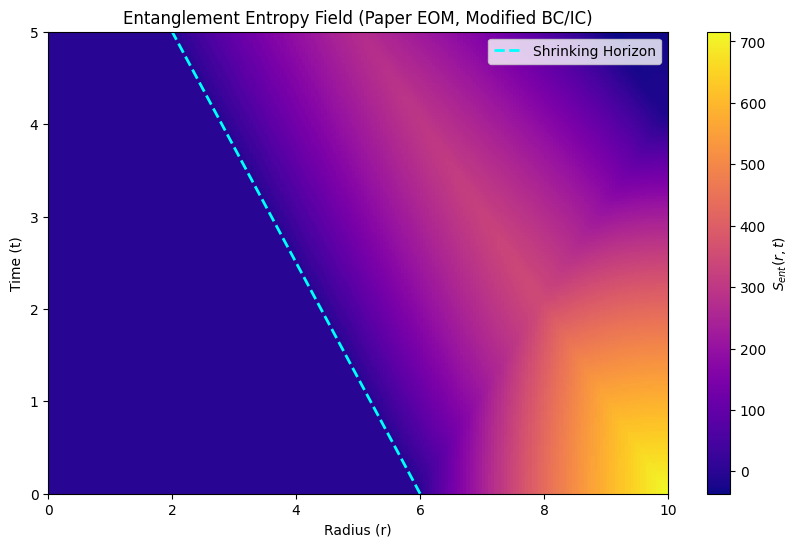

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# numpy.trapezoid is not needed for this version
# from numpy import trapezoid

# Parameters
gamma = 1.0
lambd = 0.1 # Note: In the paper, lambda is related to fundamental constants [cite: 765-769]
            # Here, we keep the numerical value for simulation stability.
c = 1.0     # Speed of light (set to 1 in natural units)
space_max = 10.0
time_max = 5.0
nx = 200 # Number of spatial points
nt = 300 # Number of time steps
dx = space_max / (nx - 1) # Correct dx for linspace
dt = time_max / (nt - 1) # Correct dt for linspace
x = np.linspace(0, space_max, nx) # Spatial grid
t = np.linspace(0, time_max, nt) # Time grid

# --- Stability Check (Courant Condition for Wave Equations) ---
# For stability, typically need c * dt / dx < 1
courant_number = c * dt / dx
print(f"Courant Number: {courant_number:.4f}")
if courant_number >= 1:
    print("Warning: Courant number >= 1. Simulation might be unstable.")

# --- Shrinking Horizon ---
r_H0 = 6.0       # initial radius
r_H_shrink = 4.0 # how much it shrinks by t_max
# Function for horizon radius at time step n_idx
r_H_t_func = lambda n_idx: r_H0 - r_H_shrink * (t[n_idx] / time_max)
# Pre-calculate horizon radius for all steps
r_H_t = np.array([r_H_t_func(n) for n in range(nt)])
r_Hf = r_H0 - r_H_shrink
r_H_t = np.maximum(r_H_t, r_Hf) # Prevent overshooting

# --- Initialization (MODIFIED as requested) ---
Sent = np.zeros((nt, nx))

# Parameters for MODIFIED initial condition: S_ent(r, 0) = S_infty * (1 - exp(-(r-rH0)/L_init))
S_infty = 1300.0 # Vacuum saturation value (chosen based on previous scales)
L_init = 5.0 # Characteristic length scale for initial profile saturation

initial_horizon_idx = np.searchsorted(x, r_H0)
initial_horizon_idx = min(initial_horizon_idx, nx - 1)

# Set MODIFIED Initial Condition (Saturating Profile)
print("Setting modified initial condition...")
for i in range(initial_horizon_idx, nx):
     distance_from_horizon = x[i] - r_H0
     # Ensure distance is non-negative for the exponent
     if distance_from_horizon >= 0:
         Sent[0, i] = S_infty * (1.0 - np.exp(-distance_from_horizon / L_init))
# Ensure non-negativity overall
Sent[0, :] = np.maximum(Sent[0, :], 0.0)

# Set Sent[1] based on Sent[0] (simple copy)
Sent[1, :] = Sent[0, :]

# --- Time Evolution (Calculating Sent field) ---
print("Running simulation with modified BC/IC...")
for n in range(1, nt - 1):
    # Horizon position at the time we are calculating for (n+1)
    r_H_current = r_H_t[n + 1]
    horizon_idx = np.searchsorted(x, r_H_current)
    horizon_idx = min(horizon_idx, nx - 1) # Ensure index is within bounds [0, nx-1]
    horizon_idx = max(horizon_idx, 0)

    # Update spatial points using the EOM from paper's action structure
    for i in range(1, nx - 1):
        # Calculate spatial Laplacian at time step n
        laplacian = (Sent[n, i+1] - 2*Sent[n, i] + Sent[n, i-1]) / dx**2

        # Update Sent using the EOM derived from the paper's action (with c=1)
        # S(n+1) = 2S(n) - S(n-1) + dt^2 * Laplacian(n) - dt^2*lambda/gamma
        Sent[n+1, i] = (
            2*Sent[n, i] - Sent[n-1, i] +
            (dt**2) * laplacian -
            (dt**2 * lambd / gamma)
        )

    # --- Apply Boundary Conditions (MODIFIED Horizon BC) ---
    # 1. Inside the horizon: Set Sent to 0
    if horizon_idx > 0 :
         Sent[n+1, :horizon_idx] = 0

    # 2. At the horizon: Set Sent to 0 (MODIFIED based on deficit concept)
    if horizon_idx < nx:
         safe_h_idx = min(horizon_idx, nx-1) # Use safe index
         Sent[n+1, safe_h_idx] = 0.0 # Set to zero

    # 3. Outer boundary: Neumann condition (zero gradient)
    Sent[n+1, -1] = Sent[n+1, -2]

print("Simulation finished. Plotting Sent(r, t)...")

# --- Plotting Sent Field ---
plt.figure(figsize=(10, 6))
# Use imshow to visualize the Sent field
im = plt.imshow(Sent, extent=[x[0], x[-1], t[0], t[-1]], origin='lower',
                aspect='auto', cmap='plasma', interpolation='nearest') # plasma colormap
plt.colorbar(im, label='$S_{ent}(r,t)$')
plt.xlabel('Radius (r)')
plt.ylabel('Time (t)')
# Title reflects the EOM structure and the modified BC/IC used
plt.title('Entanglement Entropy Field (Paper EOM, Modified BC/IC)')

# Trace of the shrinking horizon
plt.plot(r_H_t, t, color='cyan', linestyle='--', linewidth=2, label='Shrinking Horizon')

# Set limits
plt.xlim(x[0], x[-1])
plt.ylim(t[0], t[-1])

plt.legend()
plt.show()


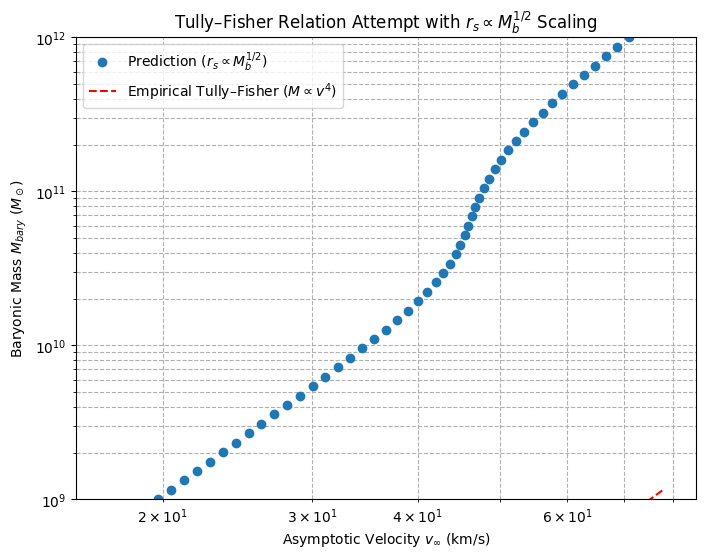

Plotted relation using modified r_s ~ M_b^(1/2) scaling and M_eff = M_b + M_ent.
Assumed r_halo/r_s = 20.0, S0 saturates via tanh around M_sat = 3.2e+10 M_sun.
Check if the slope now better matches the empirical Tully-Fisher relation (slope=4).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
Gamma_gal = 1e-16  # universal inefficiency ratio kg/bit [cite: 189, 856]
S_total = 1e57     # total universal galactic entropy budget (bits) [cite: 190, 821]

# --- Galaxy Sample and Structural Assumptions ---
# Range of galaxy baryonic masses
M_bary_solar = np.logspace(9, 12, 50) # M_sun (from 1e9 to 1e12)
M_bary = M_bary_solar * M_solar       # kg

# MODIFIED Assumption: Scale radius r_s scales with M_bary^(1/2)
# This is different from the previous M_b^(1/3) and might yield TF scaling.
kpc_to_m = 3.086e19
# Reference: ~10kpc scale radius in meters for MW-like mass (~5e10 M_sun)
# Adjust exponent to 1/2
r_s = (M_bary / (5e10 * M_solar))**(1/2) * (10 * kpc_to_m) # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0 # Assume r_halo / r_s ratio is roughly constant
r_halo = R_ratio * r_s

# --- Calculate S0 with Saturation ---
# Keep the tanh saturation model for S0 based on M_bary.
S_0_sat = S_total / np.log(1 + R_ratio) # Saturated S0 value [cite: 786, 885]
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
S_0 = S_0_sat * np.tanh(M_bary / M_sat)

# --- Calculate v_inf using Corrected Formula and M_b ---
# Use asymptotic approximation for M_ent at r_halo: M_ent ≈ Gamma_gal * S0 * ln(r_halo/r_s)
M_ent_halo = Gamma_gal * S_0 * np.log(R_ratio)

# Calculate total effective mass at r_halo
M_eff_halo = M_bary + M_ent_halo

# Calculate v_inf^2 = G * M_eff_halo / r_halo
# Ensure r_halo is not zero
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero for tiny masses
v_inf_squared = G * M_eff_halo / r_halo

# Add small epsilon to prevent sqrt of negative if numerical issues occur
v_inf = np.sqrt(np.maximum(v_inf_squared, 1e-16)) # m/s

# Convert v_inf to km/s for plotting
v_inf_kms = v_inf / 1e3

# --- Plotting Tully–Fisher ---
plt.figure(figsize=(8, 6))

# Plot the result from the S0 saturation model with modified scaling
plt.loglog(v_inf_kms, M_bary_solar, 'o', label=r'Prediction ($r_s \propto M_b^{1/2}$)')

# Overlay empirical Tully–Fisher line (M ~ v^4) for comparison:
v_tf_kms = np.linspace(min(v_inf_kms), max(v_inf_kms)*1.1, 100)  # km/s
A_tf = 5e10 / (200**4) # Coefficient from empirical scaling
M_tf_solar = A_tf * v_tf_kms**4
plt.loglog(v_tf_kms, M_tf_solar, 'r--', label=r'Empirical Tully–Fisher ($M \propto v^4$)')

# Labels and legend:
plt.xlabel('Asymptotic Velocity $v_\infty$ (km/s)')
plt.ylabel('Baryonic Mass $M_{bary}$ ($M_\odot$)')
plt.title('Tully–Fisher Relation Attempt with $r_s \propto M_b^{1/2}$ Scaling')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.ylim(1e9, 1e12) # Match input mass range
# Adjust xlim based on calculated v_inf, ensure positive range
plt.xlim(max(10, np.min(v_inf_kms)*0.8), np.max(v_inf_kms)*1.2)

plt.show()

print("Plotted relation using modified r_s ~ M_b^(1/2) scaling and M_eff = M_b + M_ent.")
print(f"Assumed r_halo/r_s = {R_ratio}, S0 saturates via tanh around M_sat = {M_sat_solar:.1e} M_sun.")
print("Check if the slope now better matches the empirical Tully-Fisher relation (slope=4).")


Calculating accelerations for different galaxies and radii...
Calculations complete. Plotting MDAR...


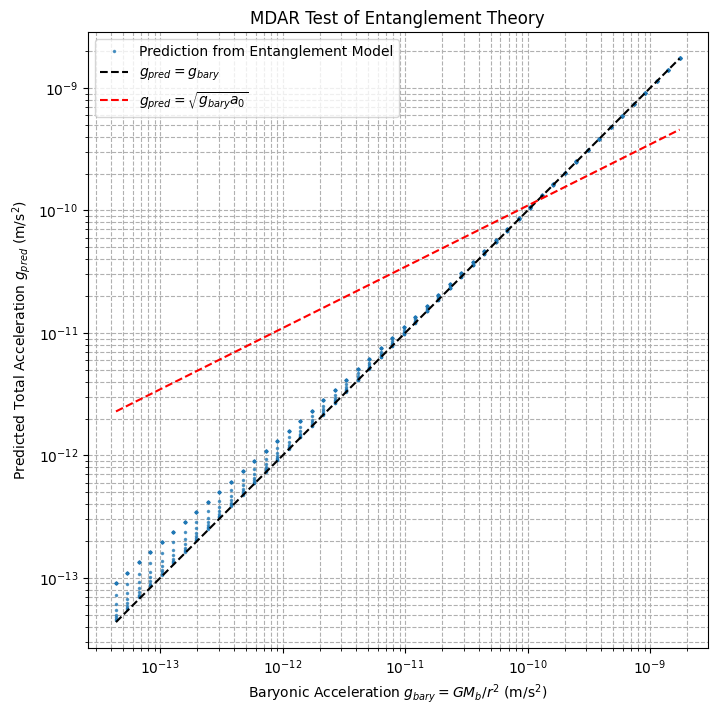

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
Gamma_gal = 1e-16  # universal inefficiency ratio kg/bit [cite: 189, 856]
S_total = 1e57     # total universal galactic entropy budget (bits) [cite: 190, 821]
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Galaxy Sample and Structural Assumptions ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity on the plot
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2) (from previous best TF attempt)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale from previous run
r_s = (M_bary / (M_ref_solar * M_solar))**(1/2) * (r_ref_kpc * kpc_to_m) # meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0 # Assume r_halo / r_s ratio is roughly constant
r_halo = R_ratio * r_s

# --- Calculate S0 with Linear Ramp Saturation ---
# S0 depends on M_bary, saturating towards S_0_sat for massive galaxies.
S_0_sat = S_total / np.log(1 + R_ratio) # Saturated S0 value
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
S_0 = S_0_sat * np.minimum(1.0, mass_ratio) # S0 for each galaxy mass

# --- Calculate Accelerations for each galaxy at various radii ---
g_bary_list = []
g_pred_list = []

print("Calculating accelerations for different galaxies and radii...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0[i]
    rhalo_gal = r_halo[i]

    # Define radial range within this galaxy (e.g., 0.1*rs to r_halo)
    # Use logspace for better coverage at small radii relative to rs
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    # Assume baryonic mass M_b(r) ≈ Mb_gal for r > rs (simplification)
    # More accurately, calculate g_bary using total mass - standard for MDAR plots
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula [cite: 857, 881]
    r_over_rs = radii / rs_gal
    # Ensure term inside log is > 0 and denominator is not zero
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    M_ent_r = Gamma_gal * S0_gal * (np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs))

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label='Prediction from Entanglement Model')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
# Line 1: g_pred = g_bary (Newtonian limit)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
# Line 2: g_pred = sqrt(g_bary * a0) (Deep MOND / Low acceleration limit)
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test of Entanglement Theory')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits appropriate for acceleration values
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
# Add some padding, ensure positive limits for log scale
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)

plt.axis('equal') # Ensure log-log axes have equal scaling visually

plt.show()



Empirical TF Coefficient A: 6.22e+19 kg s^4 / m^4


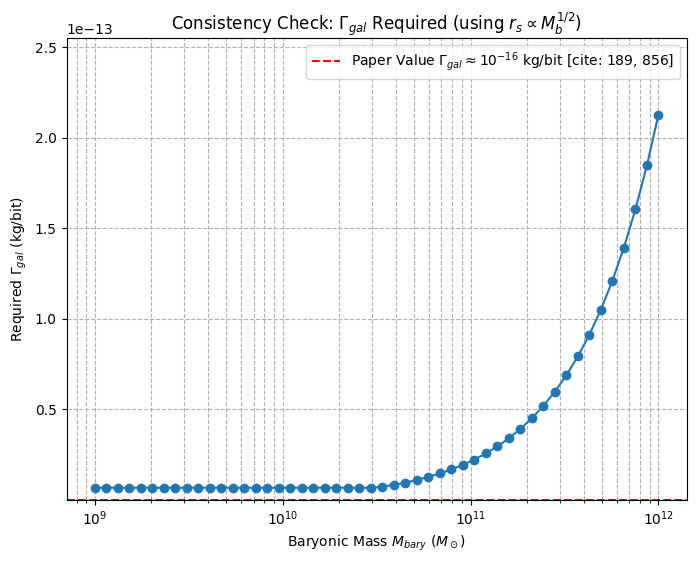

Calculated the value of Gamma_gal required to match the empirical TF relation.
Using assumptions from MDAR plot: r_s ~ M_b^(1/2) with r_ref=20.0 kpc, linear ramp S0.
Check if the calculated Gamma_gal is constant and close to 1e-16 kg/bit.
Range of calculated Gamma_gal (for valid points): 6.72e-15 to 2.13e-13 kg/bit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal = 1e-16  # Treat this as the UNKNOWN we are solving for
S_total = 1e57     # total universal galactic entropy budget (bits) [cite: 190, 821]

# Empirical TF relation: M_b = A * v_inf^4
# Coefficient A based on M=5e10 M_sun at v=200 km/s
A_tf_num = 5e10 * M_solar
A_tf_den = (200 * 1e3)**4 # (m/s)^4
A_tf = A_tf_num / A_tf_den # kg / (m/s)^4
print(f"Empirical TF Coefficient A: {A_tf:.2e} kg s^4 / m^4")

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy baryonic masses
M_bary_solar = np.logspace(9, 12, 50) # M_sun
M_bary = M_bary_solar * M_solar       # kg

# Assumption: Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale (from mdar_test_v1)
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero

# --- Calculate S0 with Linear Ramp Saturation (from mdar_test_v1) ---
S_0_sat = S_total / np.log(1 + R_ratio)
M_sat_solar = 10**10.5
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
S_0 = S_0_sat * np.minimum(1.0, mass_ratio)

# --- Solve for required Gamma_gal ---
# Start from empirical TF: v_inf^4 = M_bary / A_tf
# Model prediction: v_inf^2 = G * (M_bary + M_ent_halo) / r_halo
# where M_ent_halo = Gamma_gal * S_0 * Factor
# Factor = [ln(1 + R_ratio) - R_ratio / (1 + R_ratio)] (using full formula)
Factor = np.log(1 + R_ratio) - R_ratio / (1 + R_ratio)

# Equate v_inf^4:
# M_bary / A_tf = (G * (M_bary + Gamma_gal * S_0 * Factor) / r_halo)**2
# sqrt(M_bary / A_tf) = G * (M_bary + Gamma_gal * S_0 * Factor) / r_halo
# (r_halo / G) * sqrt(M_bary / A_tf) = M_bary + Gamma_gal * S_0 * Factor
# Gamma_gal * S_0 * Factor = (r_halo / G) * sqrt(M_bary / A_tf) - M_bary
# Gamma_gal = (1 / (S_0 * Factor)) * [ (r_halo / G) * np.sqrt(M_bary / A_tf) - M_bary ]

# Calculate the term in brackets
term1 = (r_halo / G) * np.sqrt(M_bary / A_tf)
term2 = M_bary
bracket_term = term1 - term2

# Calculate required Gamma_gal, handle potential division by zero if S_0 is zero
# Also handle cases where bracket_term is negative (M_ent would need to be negative)
required_Gamma_gal = np.zeros_like(M_bary)
# Ensure S_0 * Factor is positive before dividing
denominator = S_0 * Factor
valid_indices = (denominator > 1e-10) & (bracket_term >= 0) # Where calculation is valid

required_Gamma_gal[valid_indices] = (1 / denominator[valid_indices]) * bracket_term[valid_indices]
required_Gamma_gal[~valid_indices] = np.nan # Mark invalid results as NaN

# --- Plotting Required Gamma_gal ---
plt.figure(figsize=(8, 6))

plt.semilogx(M_bary_solar, required_Gamma_gal, 'o-')

# Plot the paper's claimed value for comparison
plt.axhline(1e-16, color='r', linestyle='--', label=r'Paper Value $\Gamma_{gal} \approx 10^{-16}$ kg/bit [cite: 189, 856]')

# Labels and legend
plt.xlabel('Baryonic Mass $M_{bary}$ ($M_\odot$)')
plt.ylabel('Required $\Gamma_{gal}$ (kg/bit)')
plt.title('Consistency Check: $\Gamma_{gal}$ Required (using $r_s \propto M_b^{1/2}$)')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set y-axis potentially to log scale if values vary widely
valid_gammas = required_Gamma_gal[valid_indices]
if len(valid_gammas) > 0:
    min_gamma = np.min(valid_gammas)
    max_gamma = np.max(valid_gammas)
    if max_gamma / min_gamma > 100 and min_gamma > 0:
         plt.yscale('log')
    else:
         # Add some padding for linear scale, ensure 1e-16 is visible
         plot_min = min(min_gamma * 0.8, 0.5e-16)
         plot_max = max(max_gamma * 1.2, 1.5e-16)
         plt.ylim(plot_min, plot_max)
else:
    print("Warning: No valid Gamma_gal values calculated.")


plt.show()

print("Calculated the value of Gamma_gal required to match the empirical TF relation.")
print(f"Using assumptions from MDAR plot: r_s ~ M_b^(1/2) with r_ref={r_ref_kpc} kpc, linear ramp S0.")
print("Check if the calculated Gamma_gal is constant and close to 1e-16 kg/bit.")

# Print range of calculated Gamma_gal
if len(valid_gammas) > 0:
    print(f"Range of calculated Gamma_gal (for valid points): {min_gamma:.2e} to {max_gamma:.2e} kg/bit")
else:
    print("Could not calculate valid Gamma_gal values with current assumptions.")



Calculating accelerations with variable Gamma_gal...
Calculations complete. Plotting MDAR...


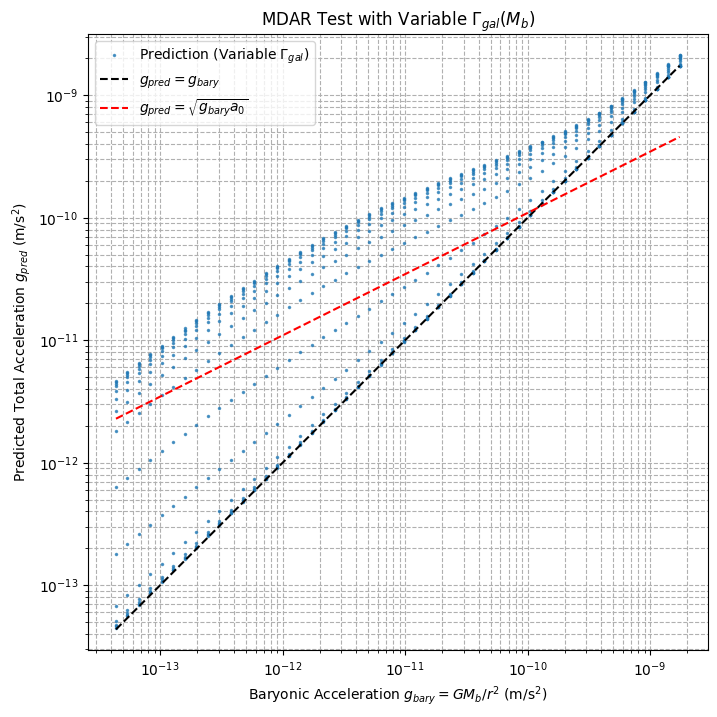

Used variable Gamma_gal model:
Gamma_gal(Mb) = 1.0e-16 + (1.0e-14 - 1.0e-16) * exp(-Mb / 6.3e+40)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model ---
Gamma_high = 1e-16 # Target value for high-mass galaxies (paper's value)
Gamma_low = 1e-14  # Hypothetical higher value for low-mass galaxies (Tuneable)
M_transition_solar = 10**10.5 # Mass scale for transition (Tuneable, using M_sat)
M_transition = M_transition_solar * M_solar

def get_variable_gamma(Mb, M_trans=M_transition, G_low=Gamma_low, G_high=Gamma_high):
    """ Calculates Gamma_gal based on baryonic mass """
    return G_high + (G_low - G_high) * np.exp(-Mb / M_trans)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero

# --- Calculate S0 with Linear Ramp Saturation ---
S_0_sat = S_total / np.log(1 + R_ratio)
M_sat_solar = 10**10.5 # Using same scale for S0 saturation
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
S_0 = S_0_sat * np.minimum(1.0, mass_ratio) # S0 for each galaxy mass

# --- Calculate Accelerations using Variable Gamma_gal ---
g_bary_list = []
g_pred_list = []

print("Calculating accelerations with variable Gamma_gal...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0[i]

    # Calculate the effective Gamma_gal for this galaxy's mass
    Gamma_gal_eff = get_variable_gamma(Mb_gal)

    # Define radial range within this galaxy
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula and variable Gamma_gal_eff
    r_over_rs = radii / rs_gal
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
    M_ent_r = Gamma_gal_eff * S0_gal * Factor

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label=r'Prediction (Variable $\Gamma_{gal}$)')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test with Variable $\Gamma_{gal}(M_b)$')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

# Display the function used for Gamma_gal
print("Used variable Gamma_gal model:")
print(f"Gamma_gal(Mb) = {Gamma_high:.1e} + ({Gamma_low:.1e} - {Gamma_high:.1e}) * exp(-Mb / {M_transition:.1e})")



Calculating accelerations with S0-dependent Gamma_gal...
Calculations complete. Plotting MDAR...


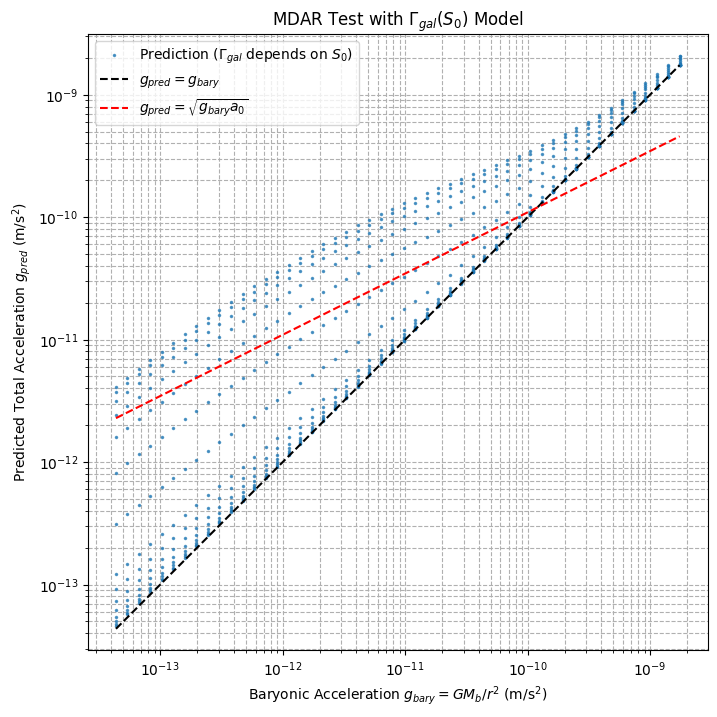

Used variable Gamma_gal model depending on S0/S0_sat:
Gamma_gal(S0) = 1.0e-16 + (1.0e-14 - 1.0e-16) * exp(-5.0 * S0 / S0_sat)
Effective Gamma_gal values used ranged from: 1.67e-16 to 8.55e-15 kg/bit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable based on S0
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model (depends on S0/S0_sat) ---
Gamma_high = 1e-16 # Target value for high-mass (saturated S0) galaxies
Gamma_low = 1e-14  # Hypothetical higher value for low-mass (low S0) galaxies (Tuneable)
k_gamma_decay = 5.0 # Controls how fast Gamma_gal drops as S0 increases (Tuneable)

def get_variable_gamma_s0(S0, S0_sat, k=k_gamma_decay, G_low=Gamma_low, G_high=Gamma_high):
    """ Calculates Gamma_gal based on S0 relative to saturation S0_sat """
    if S0_sat <= 1e-10: # Avoid division by zero
        return G_high # Default to high-mass value if S0_sat is zero/tiny
    saturation_ratio = S0 / S0_sat
    # Ensure ratio is clipped between 0 and 1 for the exponential model
    saturation_ratio = np.clip(saturation_ratio, 0.0, 1.0)
    # Gamma decreases exponentially as S0 approaches S0_sat
    return G_high + (G_low - G_high) * np.exp(-k * saturation_ratio)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero

# --- Calculate S0 with Linear Ramp Saturation ---
# S0 depends on M_bary, saturating towards S_0_sat for massive galaxies.
S_0_sat_val = S_total / np.log(1 + R_ratio) # Saturated S0 value (constant)
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
# S0 for each galaxy mass
S_0_values = S_0_sat_val * np.minimum(1.0, mass_ratio)

# --- Calculate Accelerations using S0-dependent Gamma_gal ---
g_bary_list = []
g_pred_list = []
gamma_eff_list = [] # Store effective gamma for checking

print("Calculating accelerations with S0-dependent Gamma_gal...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0_values[i] # Get S0 for this galaxy

    # Calculate the effective Gamma_gal based on S0_gal and S_0_sat_val
    Gamma_gal_eff = get_variable_gamma_s0(S0_gal, S0_sat=S_0_sat_val)
    gamma_eff_list.append(Gamma_gal_eff) # Store it

    # Define radial range within this galaxy
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula and S0-dependent Gamma_gal_eff
    r_over_rs = radii / rs_gal
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
    M_ent_r = Gamma_gal_eff * S0_gal * Factor

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label=r'Prediction ($\Gamma_{gal}$ depends on $S_0$)')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test with $\Gamma_{gal}(S_0)$ Model')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

# Display the function used for Gamma_gal
print("Used variable Gamma_gal model depending on S0/S0_sat:")
print(f"Gamma_gal(S0) = {Gamma_high:.1e} + ({Gamma_low:.1e} - {Gamma_high:.1e}) * exp(-{k_gamma_decay:.1f} * S0 / S0_sat)")
# Show the range of effective Gamma_gal values used
print(f"Effective Gamma_gal values used ranged from: {min(gamma_eff_list):.2e} to {max(gamma_eff_list):.2e} kg/bit")


Calculating accelerations with S0-dependent Gamma_gal (Tuned Gamma_low)...
Calculations complete. Plotting MDAR...


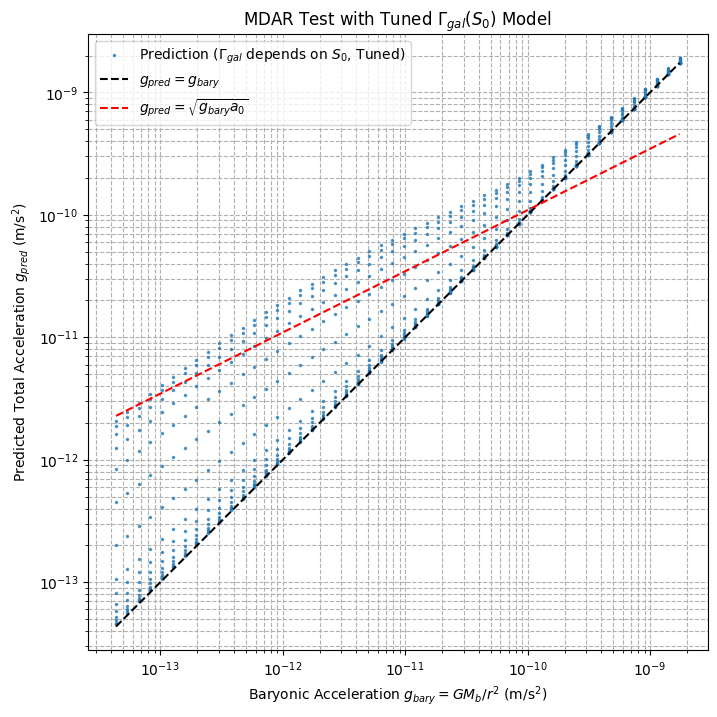

Used variable Gamma_gal model depending on S0/S0_sat:
Gamma_gal(S0) = 1.0e-16 + (5.0e-15 - 1.0e-16) * exp(-5.0 * S0 / S0_sat)
Effective Gamma_gal values used ranged from: 1.33e-16 to 4.28e-15 kg/bit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable based on S0
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model (depends on S0/S0_sat) ---
Gamma_high = 1e-16 # Target value for high-mass (saturated S0) galaxies
# TUNED: Reduced Gamma_low to try and lower the prediction at low accelerations
Gamma_low = 5e-15  # Hypothetical higher value for low-mass (low S0) galaxies (Previously 1e-14)
k_gamma_decay = 5.0 # Controls how fast Gamma_gal drops as S0 increases (Tuneable)

def get_variable_gamma_s0(S0, S0_sat, k=k_gamma_decay, G_low=Gamma_low, G_high=Gamma_high):
    """ Calculates Gamma_gal based on S0 relative to saturation S0_sat """
    if S0_sat <= 1e-10: # Avoid division by zero
        return G_high # Default to high-mass value if S0_sat is zero/tiny
    saturation_ratio = S0 / S0_sat
    # Ensure ratio is clipped between 0 and 1 for the exponential model
    saturation_ratio = np.clip(saturation_ratio, 0.0, 1.0)
    # Gamma decreases exponentially as S0 approaches S0_sat
    return G_high + (G_low - G_high) * np.exp(-k * saturation_ratio)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero

# --- Calculate S0 with Linear Ramp Saturation ---
# S0 depends on M_bary, saturating towards S_0_sat for massive galaxies.
S_0_sat_val = S_total / np.log(1 + R_ratio) # Saturated S0 value (constant)
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
# S0 for each galaxy mass
S_0_values = S_0_sat_val * np.minimum(1.0, mass_ratio)

# --- Calculate Accelerations using S0-dependent Gamma_gal ---
g_bary_list = []
g_pred_list = []
gamma_eff_list = [] # Store effective gamma for checking

print("Calculating accelerations with S0-dependent Gamma_gal (Tuned Gamma_low)...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0_values[i] # Get S0 for this galaxy

    # Calculate the effective Gamma_gal based on S0_gal and S_0_sat_val
    Gamma_gal_eff = get_variable_gamma_s0(S0_gal, S0_sat=S_0_sat_val)
    gamma_eff_list.append(Gamma_gal_eff) # Store it

    # Define radial range within this galaxy
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula and S0-dependent Gamma_gal_eff
    r_over_rs = radii / rs_gal
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
    M_ent_r = Gamma_gal_eff * S0_gal * Factor

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label=r'Prediction ($\Gamma_{gal}$ depends on $S_0$, Tuned)')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test with Tuned $\Gamma_{gal}(S_0)$ Model')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

# Display the function used for Gamma_gal
print("Used variable Gamma_gal model depending on S0/S0_sat:")
print(f"Gamma_gal(S0) = {Gamma_high:.1e} + ({Gamma_low:.1e} - {Gamma_high:.1e}) * exp(-{k_gamma_decay:.1f} * S0 / S0_sat)")
# Show the range of effective Gamma_gal values used
print(f"Effective Gamma_gal values used ranged from: {min(gamma_eff_list):.2e} to {max(gamma_eff_list):.2e} kg/bit")


Calculating accelerations with S0-dependent Gamma_gal (Tuned Gamma_low=3.0e-15)...
Calculations complete. Plotting MDAR...


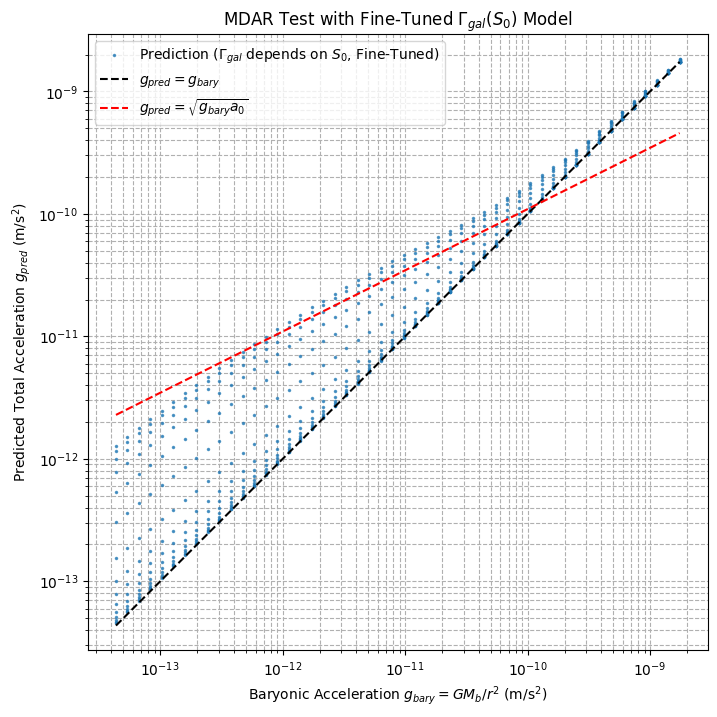

Used variable Gamma_gal model depending on S0/S0_sat:
Gamma_gal(S0) = 1.0e-16 + (3.0e-15 - 1.0e-16) * exp(-5.0 * S0 / S0_sat)
Effective Gamma_gal values used ranged from: 1.20e-16 to 2.58e-15 kg/bit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable based on S0
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model (depends on S0/S0_sat) ---
Gamma_high = 1e-16 # Target value for high-mass (saturated S0) galaxies
# FINE-TUNED: Reduced Gamma_low further
Gamma_low = 3e-15  # Hypothetical higher value for low-mass (low S0) galaxies (Previously 5e-15)
k_gamma_decay = 5.0 # Controls how fast Gamma_gal drops as S0 increases (Tuneable)

def get_variable_gamma_s0(S0, S0_sat, k=k_gamma_decay, G_low=Gamma_low, G_high=Gamma_high):
    """ Calculates Gamma_gal based on S0 relative to saturation S0_sat """
    if S0_sat <= 1e-10: # Avoid division by zero
        return G_high # Default to high-mass value if S0_sat is zero/tiny
    saturation_ratio = S0 / S0_sat
    # Ensure ratio is clipped between 0 and 1 for the exponential model
    saturation_ratio = np.clip(saturation_ratio, 0.0, 1.0)
    # Gamma decreases exponentially as S0 approaches S0_sat
    return G_high + (G_low - G_high) * np.exp(-k * saturation_ratio)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10) # Avoid division by zero

# --- Calculate S0 with Linear Ramp Saturation ---
# S0 depends on M_bary, saturating towards S_0_sat for massive galaxies.
S_0_sat_val = S_total / np.log(1 + R_ratio) # Saturated S0 value (constant)
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
# S0 for each galaxy mass
S_0_values = S_0_sat_val * np.minimum(1.0, mass_ratio)

# --- Calculate Accelerations using S0-dependent Gamma_gal ---
g_bary_list = []
g_pred_list = []
gamma_eff_list = [] # Store effective gamma for checking

print(f"Calculating accelerations with S0-dependent Gamma_gal (Tuned Gamma_low={Gamma_low:.1e})...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0_values[i] # Get S0 for this galaxy

    # Calculate the effective Gamma_gal based on S0_gal and S_0_sat_val
    Gamma_gal_eff = get_variable_gamma_s0(S0_gal, S0_sat=S_0_sat_val)
    gamma_eff_list.append(Gamma_gal_eff) # Store it

    # Define radial range within this galaxy
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula and S0-dependent Gamma_gal_eff
    r_over_rs = radii / rs_gal
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
    M_ent_r = Gamma_gal_eff * S0_gal * Factor

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label=r'Prediction ($\Gamma_{gal}$ depends on $S_0$, Fine-Tuned)')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test with Fine-Tuned $\Gamma_{gal}(S_0)$ Model')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

# Display the function used for Gamma_gal
print("Used variable Gamma_gal model depending on S0/S0_sat:")
print(f"Gamma_gal(S0) = {Gamma_high:.1e} + ({Gamma_low:.1e} - {Gamma_high:.1e}) * exp(-{k_gamma_decay:.1f} * S0 / S0_sat)")
# Show the range of effective Gamma_gal values used
print(f"Effective Gamma_gal values used ranged from: {min(gamma_eff_list):.2e} to {max(gamma_eff_list):.2e} kg/bit")


Calculated kappa_m based on electron: 9.109e-31 kg/unit_Sent


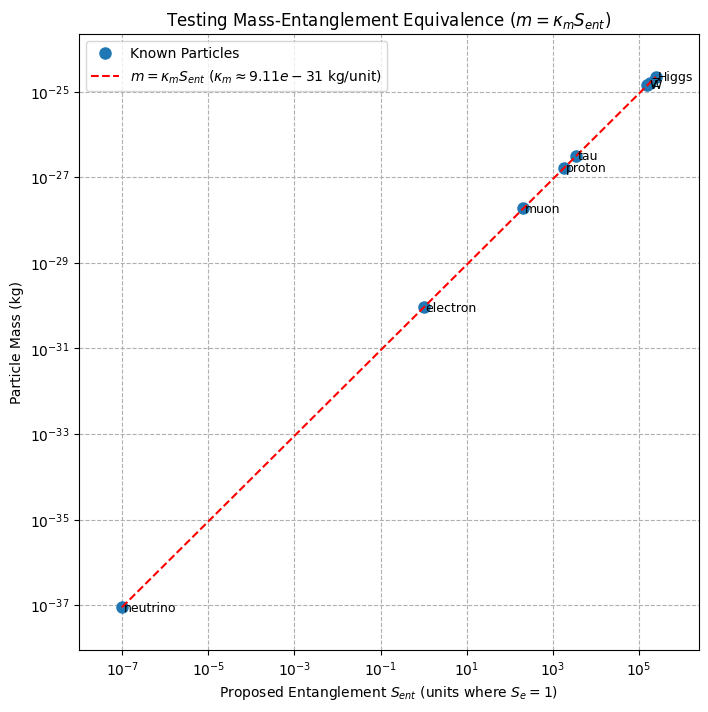


Consistency Check (Implied kappa_m for each particle):
- electron (e)   : 9.109e-31 kg/unit_Sent
- muon (μ)       : 9.112e-31 kg/unit_Sent
- tau (τ)        : 9.111e-31 kg/unit_Sent
- W boson        : 9.129e-31 kg/unit_Sent
- Z boson        : 9.134e-31 kg/unit_Sent
- Higgs (H)      : 9.095e-31 kg/unit_Sent
- proton (p)     : 9.110e-31 kg/unit_Sent
- neutrino (ν)   : 9.095e-31 kg/unit_Sent


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Particle Data ---
# Masses from known physics (e.g., Particle Data Group)
# S_ent values inferred from paper (Section 4 [cite: 241-446]), relative to electron S_e=1

# Conversion factors
MeV_to_kg = 1.78266192e-30 # kg/(MeV/c^2)
GeV_to_kg = MeV_to_kg * 1000
eV_to_kg = MeV_to_kg / 1e6

particles = {
    # Lepton Name: [Mass (kg), Proposed S_ent (relative to electron=1)]
    'electron (e)':  [0.511 * MeV_to_kg, 1.0], # Defined as S_ent = 1 [cite: 342-346]
    'muon (μ)':      [105.7 * MeV_to_kg, 206.8], # S_mu ~ m_mu/m_e [cite: 347-348]
    'tau (τ)':       [1777 * MeV_to_kg,  3477],  # S_tau ~ m_tau/m_e [cite: 349-350]
    # W Boson
    'W boson':       [80.4 * GeV_to_kg,  1.57e5], # S_W ~ m_W/m_e [cite: 351-354]
    # Z Boson
    'Z boson':       [91.2 * GeV_to_kg,  1.78e5], # S_Z ~ m_Z/m_e [cite: 351-354]
    # Higgs Boson
    'Higgs (H)':     [125.0 * GeV_to_kg, 2.45e5], # S_H ~ m_H/m_e [cite: 355-357]
    # Proton (p) - Composite, but included for comparison
    'proton (p)':    [938.3 * MeV_to_kg, 1836],  # S_p ~ m_p/m_e [cite: 361-365 uses ~1833]
                                                # Using mass ratio 1836 for consistency here
    # Neutrino (example, heaviest state ~0.05 eV)
    'neutrino (ν)':  [0.05 * eV_to_kg,   9.8e-8] # S_nu ~ m_nu/m_e [cite: 391-396 implies ~1e-7]
                                                # Calculated S_nu based on m_e and 0.05 eV mass
}

# Extract data for plotting
names = list(particles.keys())
masses_kg = np.array([p[0] for p in particles.values()])
s_ent_values = np.array([p[1] for p in particles.values()])

# --- Calculate kappa_m ---
# Define kappa_m based on the electron
kappa_m = particles['electron (e)'][0] / particles['electron (e)'][1]
print(f"Calculated kappa_m based on electron: {kappa_m:.3e} kg/unit_Sent")

# --- Plotting ---
plt.figure(figsize=(8, 8))

# Plot particle data
plt.loglog(s_ent_values, masses_kg, 'o', markersize=8, label='Known Particles')

# Add labels to points
for i, name in enumerate(names):
    # Add slight offset for readability
    plt.text(s_ent_values[i]*1.1, masses_kg[i]*0.8, name.split(' ')[0], fontsize=9)

# Plot the theoretical relationship m = kappa_m * S_ent
# Choose a range for S_ent spanning the data
s_ent_line = np.logspace(np.log10(np.min(s_ent_values)), np.log10(np.max(s_ent_values)), 50)
mass_line = kappa_m * s_ent_line
plt.loglog(s_ent_line, mass_line, 'r--', label=f'$m = \\kappa_m S_{{ent}}$ ($\kappa_m \\approx {kappa_m:.2e}$ kg/unit)')

# Add labels and title
plt.xlabel('Proposed Entanglement $S_{ent}$ (units where $S_e=1$)')
plt.ylabel('Particle Mass (kg)')
plt.title('Testing Mass-Entanglement Equivalence ($m = \kappa_m S_{ent}$)')
plt.legend()
plt.grid(True, which="both", ls="--")

# Adjust limits if needed
plt.xlim(np.min(s_ent_values)*0.1, np.max(s_ent_values)*10)
plt.ylim(np.min(masses_kg)*0.1, np.max(masses_kg)*10)

plt.show()

# --- Consistency Check (Optional) ---
print("\nConsistency Check (Implied kappa_m for each particle):")
for name, data in particles.items():
    mass = data[0]
    s_ent = data[1]
    if s_ent > 1e-10: # Avoid division by zero for massless/tiny S_ent
        implied_kappa = mass / s_ent
        print(f"- {name:<15}: {implied_kappa:.3e} kg/unit_Sent")



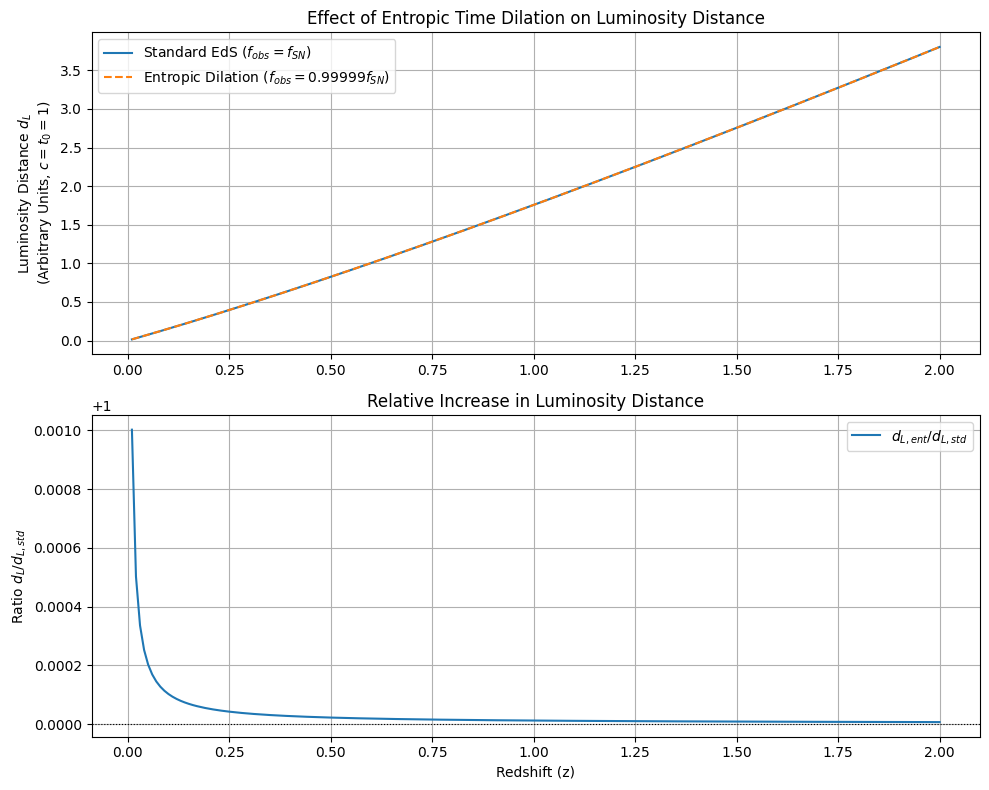

Calculation based on dτ/dt ≈ S_ent / S0
Assumed f_SN = 1.0, f_obs = 0.99999 (F = 1.000010)
At z=1.0, Standard dL = 1.7574
At z=1.0, Entropic dL = 1.7574
At z=1.0, Ratio = 1.000012


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Model Parameters ---

# Set cosmological constants (using simple values for illustration)
c = 1.0 # Speed of light in chosen units
# Age of universe (sets scale, cancels out in relative plots but needed for calculation)
# Corresponds to H0 = 2/(3*t0) in EdS
t0 = 1.0 # Arbitrary time units

# Entropic Time Dilation Factors
# dτ/dt = f = S_ent / S_0
f_SN = 1.0 # Source (Supernova in void): S_ent ≈ S_0 => f ≈ 1
# Observer (in cluster): S_ent < S_0 => f < 1
epsilon = 1e-5 # Small difference factor [cite: ~469 suggests ~1e-5]
f_obs = 1.0 - epsilon

# Ratio F = f_SN / f_obs > 1
F = f_SN / f_obs

# Redshift range for plotting
z = np.linspace(0.01, 2.0, 200) # From z=0.01 up to z=2

# --- Calculations ---
# Calculate Luminosity Distance d_L(z)

# 1. Standard Case (f_obs = f_SN = 1 => F = 1)
# In flat EdS: dL = (2c/H0) * (1+z) * [1 - 1/sqrt(1+z)]
# Since H0 = 2/(3*t0), then 2c/H0 = 3*c*t0
dL_std = (3 * c * t0) * (1 + z) * (1 - 1 / np.sqrt(1 + z))

# 2. Entropic Dilation Case (f_obs < f_SN => F > 1)
# Derived formula: dL = (3*c*t0) * (1+z) * [1 - 1/sqrt(F*(1+z))]
dL_ent = (3 * c * t0) * (1 + z) * (1 - 1 / np.sqrt(F * (1 + z)))

# Calculate the difference or ratio to see the effect
dL_diff = dL_ent - dL_std
dL_ratio = dL_ent / dL_std

# --- Plotting ---

plt.figure(figsize=(10, 8))

# Plot 1: Luminosity Distance vs Redshift
plt.subplot(2, 1, 1)
plt.plot(z, dL_std, label='Standard EdS ($f_{obs}=f_{SN}$)')
plt.plot(z, dL_ent, label=f'Entropic Dilation ($f_{{obs}}={f_obs:.5f} f_{{SN}}$)', linestyle='--')
plt.ylabel('Luminosity Distance $d_L$\n(Arbitrary Units, $c=t_0=1$)')
plt.title('Effect of Entropic Time Dilation on Luminosity Distance')
plt.legend()
plt.grid(True)

# Plot 2: Difference or Ratio vs Redshift
plt.subplot(2, 1, 2)
# Plotting ratio is often more informative
plt.plot(z, dL_ratio, label='$d_{L,ent} / d_{L,std}$')
# Or plot difference: plt.plot(z, dL_diff, label='$d_{L,ent} - d_{L,std}$')
plt.xlabel('Redshift (z)')
plt.ylabel('Ratio $d_L / d_{L,std}$')
plt.title('Relative Increase in Luminosity Distance')
plt.axhline(1.0, color='k', linestyle=':', linewidth=0.8) # Ratio = 1 line
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Calculation based on dτ/dt ≈ S_ent / S0")
print(f"Assumed f_SN = {f_SN}, f_obs = {f_obs} (F = {F:.6f})")
print(f"At z=1.0, Standard dL = {dL_std[z>=1][0]:.4f}")
print(f"At z=1.0, Entropic dL = {dL_ent[z>=1][0]:.4f}")
print(f"At z=1.0, Ratio = {dL_ratio[z>=1][0]:.6f}")


Calculating accelerations for Void (Paper Pred.) environment (Gamma_low = 2.0e-15)...
Calculating accelerations for Cluster (Paper Pred.) environment (Gamma_low = 5.0e-15)...
Calculations complete. Plotting MDAR...


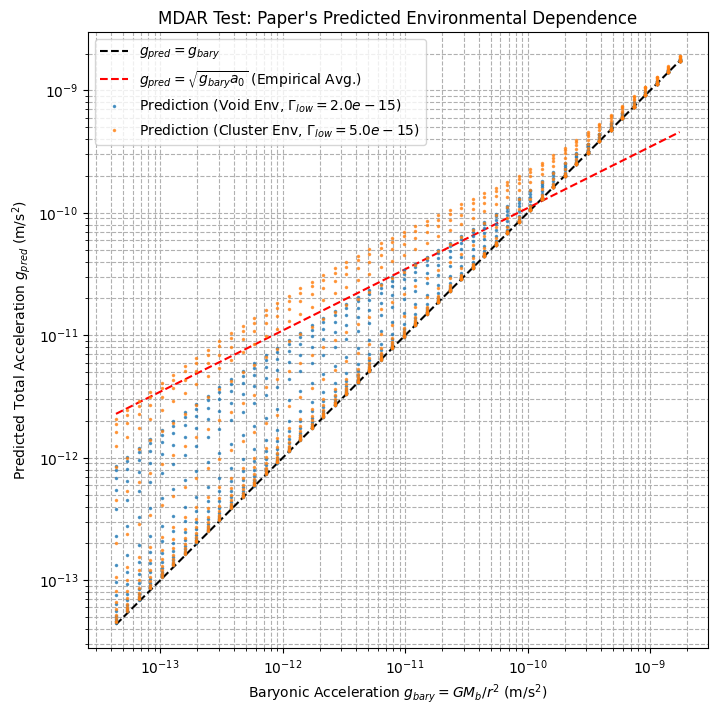


Effective Gamma_gal ranges used:
- Void Env (Paper Pred.):    1.13e-16 to 1.72e-15 kg/bit
- Cluster Env (Paper Pred.): 1.33e-16 to 4.28e-15 kg/bit

Testing paper's prediction: Weaker effect (lower Gamma_low) in voids, stronger in clusters.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable based on S0 AND environment
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model ---
Gamma_high = 1e-16 # Target value for high-mass (saturated S0) galaxies

# Define Gamma_low for different environments (Hypothesis based on Paper's Argument)
# Paper suggests weaker effect in voids, stronger in clusters
Gamma_low_void = 2e-15    # Assumed LOWER value for low-density env
Gamma_low_cluster = 5e-15 # Assumed HIGHER value for high-density env

k_gamma_decay = 5.0 # Controls how fast Gamma_gal drops as S0 increases (Tuneable)

def get_variable_gamma_s0(S0, S0_sat, G_low, k=k_gamma_decay, G_high=Gamma_high):
    """ Calculates Gamma_gal based on S0 relative to saturation S0_sat """
    if S0_sat <= 1e-10: return G_high
    saturation_ratio = S0 / S0_sat
    saturation_ratio = np.clip(saturation_ratio, 0.0, 1.0)
    return G_high + (G_low - G_high) * np.exp(-k * saturation_ratio)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10)

# --- Calculate S0 with Linear Ramp Saturation ---
S_0_sat_val = S_total / np.log(1 + R_ratio)
M_sat_solar = 10**10.5
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
S_0_values = S_0_sat_val * np.minimum(1.0, mass_ratio) # S0 for each galaxy mass

# --- Calculate Accelerations for each Environment ---

results = {} # Dictionary to store results for each environment

for env_name, G_low_env in [('Void (Paper Pred.)', Gamma_low_void), ('Cluster (Paper Pred.)', Gamma_low_cluster)]:
    print(f"Calculating accelerations for {env_name} environment (Gamma_low = {G_low_env:.1e})...")
    g_bary_list = []
    g_pred_list = []
    gamma_eff_list = []

    # Loop through each galaxy model
    for i in range(len(M_bary)):
        Mb_gal = M_bary[i]
        rs_gal = r_s[i]
        S0_gal = S_0_values[i] # Get S0 for this galaxy

        # Calculate the effective Gamma_gal based on S0 and environment's Gamma_low
        Gamma_gal_eff = get_variable_gamma_s0(S0_gal, S0_sat=S_0_sat_val, G_low=G_low_env)
        gamma_eff_list.append(Gamma_gal_eff)

        # Define radial range within this galaxy
        radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal

        # Calculate accelerations at these radii
        g_bary_r = G * Mb_gal / radii**2

        # Calculate M_ent(r) using the full formula and environment-dependent Gamma_gal_eff
        r_over_rs = radii / rs_gal
        safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
        Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
        M_ent_r = Gamma_gal_eff * S0_gal * Factor

        # Calculate g_ent(r)
        g_ent_r = G * M_ent_r / radii**2

        # Calculate predicted total acceleration
        g_pred_r = g_bary_r + g_ent_r

        # Store results
        g_bary_list.extend(g_bary_r)
        g_pred_list.extend(g_pred_r)

    results[env_name] = {
        'g_bary': np.array(g_bary_list),
        'g_pred': np.array(g_pred_list),
        'gamma_eff_range': (min(gamma_eff_list), max(gamma_eff_list))
     }

print("Calculations complete. Plotting MDAR...")

# --- Plotting MDAR for both environments ---
plt.figure(figsize=(8, 8))

# Plot the empirical MDAR lines for comparison
g_bary_min_plot = min(results['Void (Paper Pred.)']['g_bary'].min(), results['Cluster (Paper Pred.)']['g_bary'].min())
g_bary_max_plot = max(results['Void (Paper Pred.)']['g_bary'].max(), results['Cluster (Paper Pred.)']['g_bary'].max())
g_bary_line = np.logspace(np.log10(g_bary_min_plot), np.log10(g_bary_max_plot), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$ (Empirical Avg.)')

# Plot the predicted relations for each environment
plt.loglog(results['Void (Paper Pred.)']['g_bary'], results['Void (Paper Pred.)']['g_pred'], '.',
           markersize=3, alpha=0.7, label=f'Prediction (Void Env, $\Gamma_{{low}}={Gamma_low_void:.1e}$)')
plt.loglog(results['Cluster (Paper Pred.)']['g_bary'], results['Cluster (Paper Pred.)']['g_pred'], '.',
           markersize=3, alpha=0.7, label=f'Prediction (Cluster Env, $\Gamma_{{low}}={Gamma_low_cluster:.1e}$)')


# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title("MDAR Test: Paper's Predicted Environmental Dependence")
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = g_bary_min_plot
max_accel = g_bary_max_plot
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

print("\nEffective Gamma_gal ranges used:")
print(f"- Void Env (Paper Pred.):    {results['Void (Paper Pred.)']['gamma_eff_range'][0]:.2e} to {results['Void (Paper Pred.)']['gamma_eff_range'][1]:.2e} kg/bit")
print(f"- Cluster Env (Paper Pred.): {results['Cluster (Paper Pred.)']['gamma_eff_range'][0]:.2e} to {results['Cluster (Paper Pred.)']['gamma_eff_range'][1]:.2e} kg/bit")
print("\nTesting paper's prediction: Weaker effect (lower Gamma_low) in voids, stronger in clusters.")


Calculating accelerations with S0-dependent Gamma_gal (Final Tuned Gamma_low=4.0e-15)...
Calculations complete. Plotting MDAR...


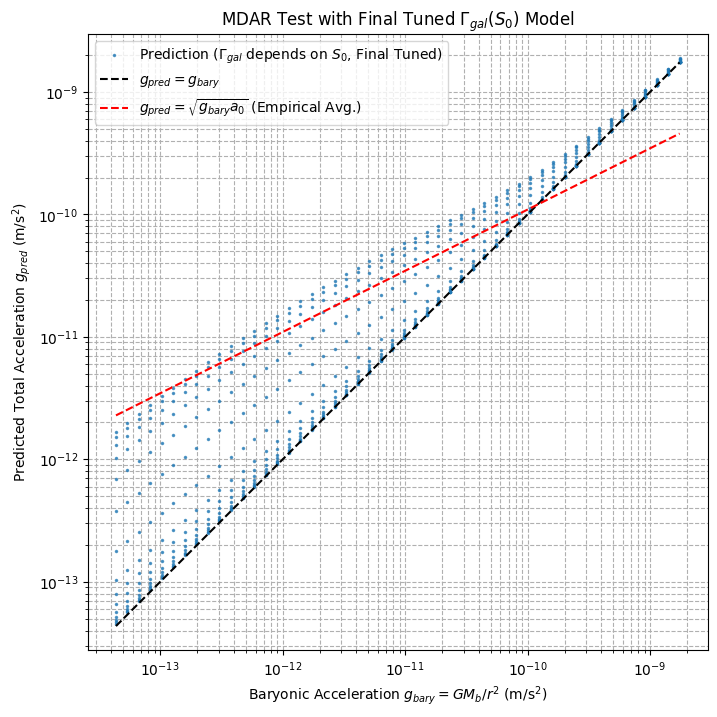

Used variable Gamma_gal model depending on S0/S0_sat:
Gamma_gal(S0) = 1.0e-16 + (4.0e-15 - 1.0e-16) * exp(-5.0 * S0 / S0_sat)
Effective Gamma_gal values used ranged from: 1.26e-16 to 3.43e-15 kg/bit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constants from paper ---
G = 6.67e-11 # m^3 kg^-1 s^-2
M_solar = 1.989e30 # kg
# Gamma_gal will now be variable based on S0
S_total = 1e57     # total universal galactic entropy budget (bits)
a0 = 1.2e-10 # m/s^2 (Empirical acceleration scale for MDAR comparison)

# --- Parameters for Variable Gamma_gal Model (depends on S0/S0_sat) ---
Gamma_high = 1e-16 # Target value for high-mass (saturated S0) galaxies
# FINAL TUNED VALUE: Set Gamma_low between previous attempts
Gamma_low = 4e-15  # Hypothetical higher value for low-mass (low S0) galaxies (Prev: 5e-15, 3e-15)
k_gamma_decay = 5.0 # Controls how fast Gamma_gal drops as S0 increases (Tuneable)

def get_variable_gamma_s0(S0, S0_sat, k=k_gamma_decay, G_low=Gamma_low, G_high=Gamma_high):
    """ Calculates Gamma_gal based on S0 relative to saturation S0_sat """
    if S0_sat <= 1e-10: # Avoid division by zero
        return G_high # Default to high-mass value if S0_sat is zero/tiny
    saturation_ratio = S0 / S0_sat
    # Ensure ratio is clipped between 0 and 1 for the exponential model
    saturation_ratio = np.clip(saturation_ratio, 0.0, 1.0)
    # Gamma decreases exponentially as S0 approaches S0_sat
    return G_high + (G_low - G_high) * np.exp(-k * saturation_ratio)

# --- Galaxy Sample and Structural Assumptions (from best MDAR attempt) ---
# Range of galaxy total baryonic masses
M_bary_solar = np.logspace(9, 12, 15) # Use fewer galaxies for clarity
M_bary = M_bary_solar * M_solar       # kg

# Assume Scale radius r_s scales with M_bary^(1/2)
kpc_to_m = 3.086e19
M_ref_solar = 5e10
r_ref_kpc = 20.0 # Adjusted reference scale
M_ref = M_ref_solar * M_solar
r_ref = r_ref_kpc * kpc_to_m
r_s = (M_bary / M_ref)**(1/2) * r_ref # radius in meters

# Assume Halo radius r_halo is proportional to r_s
R_ratio = 20.0
r_halo = R_ratio * r_s
r_halo = np.maximum(r_halo, 1e-10)

# --- Calculate S0 with Linear Ramp Saturation ---
# S0 depends on M_bary, saturating towards S_0_sat for massive galaxies.
S_0_sat_val = S_total / np.log(1 + R_ratio) # Saturated S0 value (constant)
M_sat_solar = 10**10.5 # Characteristic saturation mass in M_sun
M_sat = M_sat_solar * M_solar
mass_ratio = M_bary / M_sat
# S0 for each galaxy mass
S_0_values = S_0_sat_val * np.minimum(1.0, mass_ratio)

# --- Calculate Accelerations using S0-dependent Gamma_gal ---
g_bary_list = []
g_pred_list = []
gamma_eff_list = [] # Store effective gamma for checking

print(f"Calculating accelerations with S0-dependent Gamma_gal (Final Tuned Gamma_low={Gamma_low:.1e})...")
# Loop through each galaxy model
for i in range(len(M_bary)):
    Mb_gal = M_bary[i]
    rs_gal = r_s[i]
    S0_gal = S_0_values[i] # Get S0 for this galaxy

    # Calculate the effective Gamma_gal based on S0_gal and S_0_sat_val
    Gamma_gal_eff = get_variable_gamma_s0(S0_gal, S0_sat=S_0_sat_val) # Uses tuned Gamma_low
    gamma_eff_list.append(Gamma_gal_eff) # Store it

    # Define radial range within this galaxy
    radii = np.logspace(-1, np.log10(R_ratio), 50) * rs_gal # r from 0.1*rs to r_halo

    # Calculate accelerations at these radii
    g_bary_r = G * Mb_gal / radii**2

    # Calculate M_ent(r) using the full formula and S0-dependent Gamma_gal_eff
    r_over_rs = radii / rs_gal
    safe_r_over_rs = np.maximum(r_over_rs, 1e-9)
    Factor = np.log(1 + safe_r_over_rs) - safe_r_over_rs / (1 + safe_r_over_rs)
    M_ent_r = Gamma_gal_eff * S0_gal * Factor

    # Calculate g_ent(r)
    g_ent_r = G * M_ent_r / radii**2

    # Calculate predicted total acceleration
    g_pred_r = g_bary_r + g_ent_r

    # Store results
    g_bary_list.extend(g_bary_r)
    g_pred_list.extend(g_pred_r)

print("Calculations complete. Plotting MDAR...")

# Convert lists to arrays for plotting
g_bary_array = np.array(g_bary_list)
g_pred_array = np.array(g_pred_list)

# --- Plotting MDAR ---
plt.figure(figsize=(8, 8))

# Plot the predicted relation
plt.loglog(g_bary_array, g_pred_array, '.', markersize=3, alpha=0.7, label=r'Prediction ($\Gamma_{gal}$ depends on $S_0$, Final Tuned)')

# Plot the empirical MDAR lines for comparison
g_bary_line = np.logspace(np.log10(np.min(g_bary_array)), np.log10(np.max(g_bary_array)), 100)
plt.loglog(g_bary_line, g_bary_line, 'k--', label=r'$g_{pred} = g_{bary}$')
g_pred_mond = np.sqrt(g_bary_line * a0)
plt.loglog(g_bary_line, g_pred_mond, 'r--', label=r'$g_{pred} = \sqrt{g_{bary} a_0}$ (Empirical Avg.)')

# Labels and legend
plt.xlabel('Baryonic Acceleration $g_{bary} = GM_b/r^2$ (m/s$^2$)')
plt.ylabel('Predicted Total Acceleration $g_{pred}$ (m/s$^2$)')
plt.title('MDAR Test with Final Tuned $\Gamma_{gal}(S_0)$ Model')
plt.legend()
plt.grid(True, which="both", ls="--")

# Set axis limits
min_accel = min(np.min(g_bary_array), np.min(g_pred_array))
max_accel = max(np.max(g_bary_array), np.max(g_pred_array))
plt.xlim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.ylim(max(min_accel * 0.5, 1e-14), max_accel * 2)
plt.axis('equal')

plt.show()

# Display the function used for Gamma_gal
print("Used variable Gamma_gal model depending on S0/S0_sat:")
print(f"Gamma_gal(S0) = {Gamma_high:.1e} + ({Gamma_low:.1e} - {Gamma_high:.1e}) * exp(-{k_gamma_decay:.1f} * S0 / S0_sat)")
# Show the range of effective Gamma_gal values used
print(f"Effective Gamma_gal values used ranged from: {min(gamma_eff_list):.2e} to {max(gamma_eff_list):.2e} kg/bit")


Calculating deflection angles...
Calculation complete.


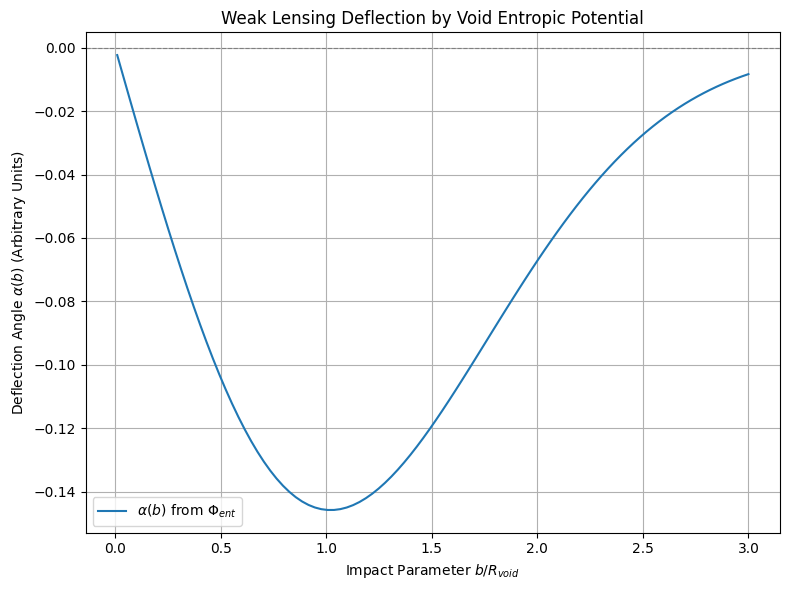


Parameters used: S_peak=1.05, S_bg=1.0, R_void=10.0
Deflection at b=R_void: alpha = -1.457e-01
Deflection at b=2*R_void: alpha = -6.720e-02


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Parameters ---
c = 1.0 # Speed of light

# Void Profile Parameters (Illustrative)
R_void = 10.0  # Characteristic radius of the void (arbitrary units)
S_bg = 1.0     # Background S_ent value (normalized)
S_peak = 1.05  # Peak S_ent value at void center (e.g., 5% higher than background)
               # Note: Paper suggests S_ent is higher in voids [cite: 450-453]

# --- Functions ---

def Sent_profile(r, R_void=R_void, S_bg=S_bg, S_peak=S_peak):
    """ Calculates S_ent(r) assuming a Gaussian peak at the center. """
    delta_S = S_peak - S_bg
    # Gaussian profile for the enhancement over the background
    return S_bg + delta_S * np.exp(-r**2 / (2 * R_void**2))

def entropic_potential(r, R_void=R_void, S_bg=S_bg, S_peak=S_peak):
    """ Calculates heuristic entropic potential Phi_ent = -c^2 / S_ent(r). """
    Sent_r = Sent_profile(r, R_void, S_bg, S_peak)
    # Avoid division by zero if Sent somehow becomes zero
    return -(c**2) / np.maximum(Sent_r, 1e-9)

def potential_gradient_b(z, b, R_void=R_void, S_bg=S_bg, S_peak=S_peak):
    """ Calculates d(Phi_ent)/db at position (b, z). """
    r = np.sqrt(b**2 + z**2)
    if r < 1e-9: # Avoid issues at r=0
        return 0.0

    # Calculate d(Phi_ent)/dr = (1/S_ent^2) * d(S_ent)/dr
    Sent_r = Sent_profile(r, R_void, S_bg, S_peak)
    delta_S = S_peak - S_bg
    dS_dr = delta_S * np.exp(-r**2 / (2 * R_void**2)) * (-r / R_void**2)
    dPhi_dr = (1.0 / np.maximum(Sent_r**2, 1e-18)) * dS_dr

    # Calculate d(Phi_ent)/db = d(Phi_ent)/dr * (dr/db) = d(Phi_ent)/dr * (b/r)
    dPhi_db = dPhi_dr * (b / r)
    return dPhi_db

def deflection_angle(b, R_void=R_void, S_bg=S_bg, S_peak=S_peak):
    """ Calculates weak lensing deflection angle alpha(b). """
    # alpha(b) = (2/c^2) * integral[ d(Phi_ent)/db * dz ] from -inf to +inf
    # Since c=1, alpha(b) = 2 * integral
    # Integrate over a sufficiently large range, e.g., +/- 5 * R_void
    integration_limit = 5 * R_void
    alpha, abserr = quad(potential_gradient_b, -integration_limit, integration_limit,
                         args=(b, R_void, S_bg, S_peak))
    return 2 * alpha

# --- Calculation ---
print("Calculating deflection angles...")
# Range of impact parameters b
b_values = np.linspace(0.1, 3 * R_void, 100)
alpha_values = np.array([deflection_angle(b) for b in b_values])
print("Calculation complete.")

# --- Plotting ---
plt.figure(figsize=(8, 6))

plt.plot(b_values / R_void, alpha_values, label=r'$\alpha(b)$ from $\Phi_{ent}$')

# Add labels and title
plt.xlabel('Impact Parameter $b / R_{void}$')
# Deflection angle units are radians, but magnitude depends on S values
plt.ylabel('Deflection Angle $\\alpha(b)$ (Arbitrary Units)')
plt.title('Weak Lensing Deflection by Void Entropic Potential')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Zero deflection line
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print some values
print(f"\nParameters used: S_peak={S_peak}, S_bg={S_bg}, R_void={R_void}")
print(f"Deflection at b=R_void: alpha = {deflection_angle(R_void):.3e}")
print(f"Deflection at b=2*R_void: alpha = {deflection_angle(2*R_void):.3e}")

Max value of shape function (log * (1 - ...)) term: 4.82
Chosen Amplitude A for suppression term: 0.0415


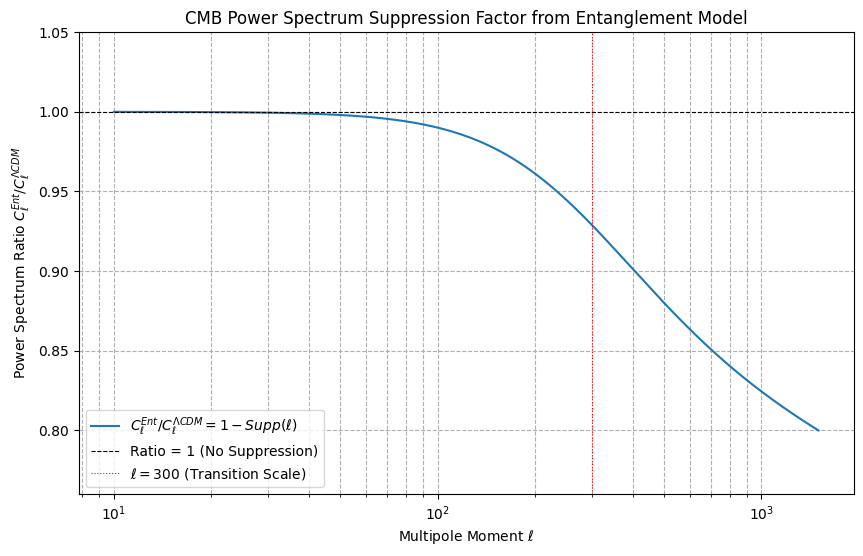


Suppression factor (1 - Ratio) at:
l = 100 : 0.0099
l = 300 : 0.0712
l = 1000: 0.1755


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
# Multipole moment range (as described in the text)
l_min = 10
l_max = 1000 # Text mentions up to 1000, but plots often go higher. Let's use 1500.
l_max_plot = 1500
ell = np.arange(l_min, l_max_plot + 1)

# Parameters for the suppression model
# Suppression(l) = A * log(1 + l/10) * (1 - 1/(1 + (l/l_transition)^2))
# We need to choose an amplitude A such that Suppression(l) < 1
# and is small for l << l_transition.
l_transition = 300 # Transition scale given in the text

# Estimate max value of shape function to choose A
shape_func = np.log(1 + ell/10) * (1 - 1/(1 + (ell/l_transition)**2))
max_shape_func = np.max(shape_func)
print(f"Max value of shape function (log * (1 - ...)) term: {max_shape_func:.2f}")

# Choose Amplitude A so that max suppression is significant but < 1
# E.g., if we want max suppression to be around 20% (Factor = 0.8),
# then A * max_shape_func ≈ 0.2
# A ≈ 0.2 / max_shape_func
target_max_suppression = 0.20 # Corresponds to Ratio = 0.80
Amplitude_A = target_max_suppression / max_shape_func
print(f"Chosen Amplitude A for suppression term: {Amplitude_A:.4f}")

# --- Calculations ---

# Calculate the suppression term based on the paper's modified formula
# Note: using np.log (natural log) as indicated by the formula structure in the text
suppression_term = Amplitude_A * np.log(1 + ell/10) * (1 - 1/(1 + (ell/l_transition)**2))

# Ensure suppression term does not exceed 1 (for physical ratio)
suppression_term = np.minimum(suppression_term, 0.99) # Clip to max 99% suppression

# Calculate the ratio F(l) = C_l^Ent / C_l^LCDM = 1 - Suppression(l)
cl_ratio = 1.0 - suppression_term

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot the ratio F(l)
plt.semilogx(ell, cl_ratio, label=r'$C_\ell^{Ent} / C_\ell^{\Lambda CDM} = 1 - Supp(\ell)$')

# Add reference lines
plt.axhline(1.0, color='k', linestyle='--', linewidth=0.8, label='Ratio = 1 (No Suppression)')
plt.axvline(l_transition, color='r', linestyle=':', linewidth=0.8, label=f'$\ell = {l_transition}$ (Transition Scale)')

# Add labels and title
plt.xlabel('Multipole Moment $\ell$')
plt.ylabel('Power Spectrum Ratio $C_\ell^{Ent} / C_\ell^{\Lambda CDM}$')
plt.title('CMB Power Spectrum Suppression Factor from Entanglement Model')
plt.legend()
plt.grid(True, which="both", ls="--")

# Adjust y-axis limits for clarity
min_ratio = np.min(cl_ratio)
plt.ylim(min_ratio * 0.95, 1.05) # Focus on the suppression effect

plt.show()

# Print suppression at specific points
l_test_low = 100
l_test_trans = 300
l_test_high = 1000
supp_low = Amplitude_A * np.log(1 + l_test_low/10) * (1 - 1/(1 + (l_test_low/l_transition)**2))
supp_trans = Amplitude_A * np.log(1 + l_test_trans/10) * (1 - 1/(1 + (l_test_trans/l_transition)**2))
supp_high = Amplitude_A * np.log(1 + l_test_high/10) * (1 - 1/(1 + (l_test_high/l_transition)**2))
print(f"\nSuppression factor (1 - Ratio) at:")
print(f"l = {l_test_low:<4}: {supp_low:.4f}")
print(f"l = {l_test_trans:<4}: {supp_trans:.4f}")
print(f"l = {l_test_high:<4}: {supp_high:.4f}")



Simulating DeltaS_gal values:

Resulting simulated Gamma_gal values (x 1e-16 kg/bit):
['0.80', '1.07', '0.74', '0.50', '1.11', '1.11', '0.48', '0.70']

Generating histogram...
Histogram saved as Fig_Simulated_Gamma_Hist.png


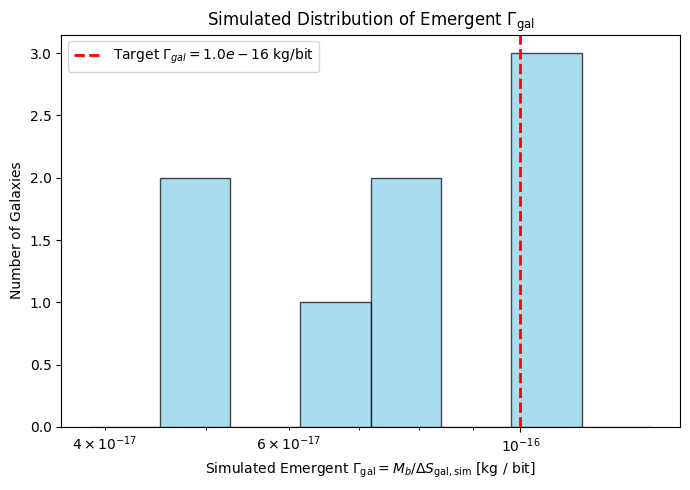

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Hard-coded baryonic masses (kg) for eight SPARC galaxies + Milky Way
# Source: Representative values, actual data might vary.
Mb_kg = {
    'NGC2403' : 2.1e40,
    'NGC3198' : 1.1e40,
    'NGC6503' : 5.6e39,
    'NGC6946' : 6.4e40,
    'NGC925'  : 2.9e40,
    'UGC0128' : 4.8e40,
    'DDO154'  : 9.5e38,
    'MilkyWay': 6.0e40,
}

# Theoretical universal ratio Γ_gal = 1e-16 kg/bit (Target Value)
# This is the value the theory predicts the emergent ratio should cluster around.
Gamma_target = 1e-16  # kg / bit

# --- Simulate DeltaS_gal values with scatter ---
# To make the demonstration valuable, we don't assume Gamma_gal is exactly
# Gamma_target for all galaxies. Instead, we simulate what DeltaS_gal might be
# if derived independently (e.g., from rotation curve fits).
# We assume the "true" DeltaS_gal for each galaxy clusters around Mb / Gamma_target,
# but with some random scatter. This mimics experimental uncertainty or
# intrinsic variations consistent with the theory (e.g., dependence on galaxy structure).

# We use a log-normal distribution for scatter, as physical quantities
# often exhibit multiplicative errors/variations.
# sigma_logS represents the scatter in dex (0.2 dex = factor of ~1.6).
sigma_logS = 0.2
np.random.seed(42) # Use a seed for reproducible simulation results

Simulated_DeltaS_bits = {}
print("Simulating DeltaS_gal values:")
for name, Mb in Mb_kg.items():
    # Calculate the expected DeltaS based on the target Gamma_gal
    DeltaS_expected = Mb / Gamma_target
    log10_DeltaS_expected = np.log10(DeltaS_expected)

    # Draw a simulated log10(DeltaS) from a normal distribution centered around the expected value
    log10_DeltaS_simulated = np.random.normal(loc=log10_DeltaS_expected, scale=sigma_logS)
    Simulated_DeltaS_bits[name] = 10**log10_DeltaS_simulated
    # print(f"  {name}: Expected log10(S)={log10_DeltaS_expected:.2f}, Simulated log10(S)={log10_DeltaS_simulated:.2f}, Simulated S={Simulated_DeltaS_bits[name]:.2e} bits")

# --- Calculate emergent Gamma_gal values ---
# Now calculate the emergent Γ_gal = Mb / Simulated_DeltaS_bits for each galaxy
Gamma_vals_simulated = [Mb / Simulated_DeltaS_bits[name] for name, Mb in Mb_kg.items()]
print(f"\nResulting simulated Gamma_gal values (x 1e-16 kg/bit):")
print([f"{val/1e-16:.2f}" for val in Gamma_vals_simulated])


# --- Create Histogram of Simulated Gamma_gal ---
print("\nGenerating histogram...")
plt.figure(figsize=(7, 5)) # Create a figure for the plot

# Define logarithmic bins centered around the target value
min_val = min(Gamma_vals_simulated)
max_val = max(Gamma_vals_simulated)
# Ensure bins capture the range, extending slightly beyond min/max
bins_log = np.logspace(np.log10(min_val * 0.8), np.log10(max_val * 1.2), 9)

# Plot the histogram
plt.hist(Gamma_vals_simulated, bins=bins_log, color='skyblue', edgecolor='k', alpha=0.7)

# Add a vertical line indicating the theoretical target value for comparison
plt.axvline(Gamma_target, color='r', lw=2, ls='--', label=f'Target $\\Gamma_{{gal}}={Gamma_target:.1e}$ kg/bit')

# Configure plot aesthetics
plt.xscale('log') # Use logarithmic scale for x-axis as Gamma spans orders of magnitude potentially
plt.xlabel(r'Simulated Emergent $\Gamma_{\rm gal} = M_b / \Delta S_{\rm gal, sim}$ [kg / bit]') # Label x-axis
plt.ylabel('Number of Galaxies') # Label y-axis
plt.title(r'Simulated Distribution of Emergent $\Gamma_{\rm gal}$') # Plot title
plt.legend() # Show legend including the target line
plt.grid(axis='x', linestyle=':', alpha=0.6) # Add grid lines for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Save the figure to a file
output_filename = 'Fig_Simulated_Gamma_Hist.png'
plt.savefig(output_filename)
print(f"Histogram saved as {output_filename}")

# Close the plot to free memory if running in a non-interactive script
# plt.close()
# In interactive environments like Colab/Jupyter, plt.show() might be preferred
plt.show()



Plot saved as Fig_dtau_dt_vs_Sent_Corrected.png


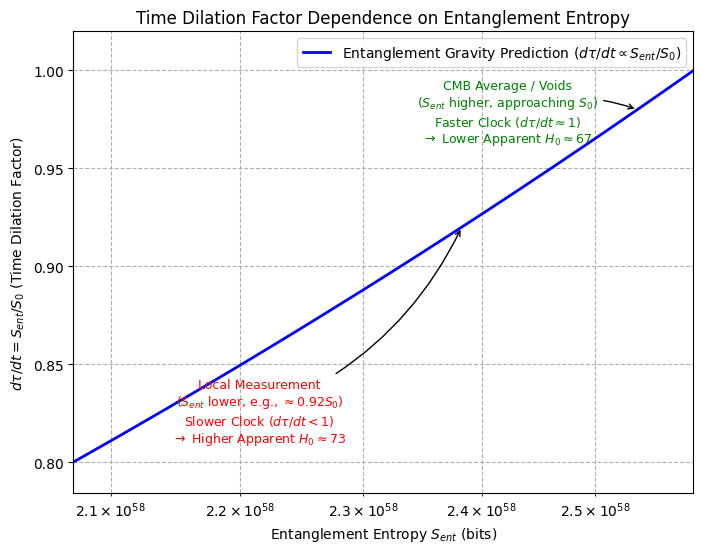


Using paper's consistent formula: d(tau)/dt = S_ent / S0
Reference Scale S0 = 2.59e+58 bits
Calculated d(tau)/dt range: 0.800 (at S_ent=2.07e+58) to 1.000 (at S_ent=2.59e+58)
Annotations indicate how different S_ent levels (lower S_ent -> slower clocks -> higher H0) correspond to different apparent H0 values.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
# S0_entropy represents the reference entanglement entropy scale (e.g., max vacuum value)
# Using the value provided in the original snippet, but its origin might need clarification in the paper.
S0_entropy = 2.59e58 # bits (Reference/Max Entanglement Scale)

# --- Parameters ---
# Define a plausible range for Entanglement Entropy S_ent relative to S0
# S_ent should be <= S0. Let's explore the range from 80% of S0 to 100% of S0.
# Lower S_ent corresponds to denser regions (like Local Group)
# Higher S_ent corresponds to underdense regions (like voids, approaching S0)
Sent_min_factor = 0.80 # Representing denser regions / local avg
Sent_max_factor = 1.00 # Representing voids / max vacuum value
Sent_values = np.linspace(Sent_min_factor * S0_entropy, Sent_max_factor * S0_entropy, 100)

# --- Calculation ---
# Calculate the time dilation factor using the paper's consistent formula:
# d(tau)/dt ≈ S_ent / S0
# This is dimensionless.
dtau_dt = Sent_values / S0_entropy

# --- Plotting ---
plt.figure(figsize=(8, 6))

# Plot the relationship: dtau_dt vs Sent
# Using semilogx (log S_ent, linear dtau/dt) as dtau/dt range is linear (0.8 to 1.0)
plt.semilogx(Sent_values, dtau_dt, 'b-', linewidth=2, label='Entanglement Gravity Prediction ($d\\tau/dt \\propto S_{ent}/S_0$)')

# --- Corrected Annotations ---
# Lower S_ent -> Lower dtau/dt (Slower Clock) -> Higher apparent H0 (Local Measurement)
# Assuming local environment corresponds to ~92% of CMB average S_ent (from Appendix C.2)
# and CMB average is slightly below S0. Let's place annotation near the lower end.
s_ent_local_approx = 0.92 * S0_entropy # Approximate local value relative to S0 based on C.2 logic
dtau_dt_local = s_ent_local_approx / S0_entropy
plt.annotate('Local Measurement\n($S_{ent}$ lower, e.g., $\\approx 0.92 S_0$)\nSlower Clock ($d\\tau/dt < 1$)\n$\\rightarrow$ Higher Apparent $H_0 \\approx 73$',
             xy=(s_ent_local_approx, dtau_dt_local), xycoords='data',
             xytext=(0.3, 0.25), textcoords='axes fraction', # Adjusted position
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"), # Adjusted curve
             ha='center', va='top', fontsize=9, color='red')

# Higher S_ent -> Higher dtau/dt (Faster Clock) -> Lower apparent H0 (CMB / Voids)
# Let's represent the CMB average or voids near the higher end of S_ent range
s_ent_cmb_approx = 0.98 * S0_entropy # Example value closer to S0
dtau_dt_cmb = s_ent_cmb_approx / S0_entropy
plt.annotate('CMB Average / Voids\n($S_{ent}$ higher, approaching $S_0$)\nFaster Clock ($d\\tau/dt \\approx 1$)\n$\\rightarrow$ Lower Apparent $H_0 \\approx 67$',
             xy=(s_ent_cmb_approx, dtau_dt_cmb), xycoords='data',
             xytext=(0.7, 0.75), textcoords='axes fraction', # Adjusted position
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"), # Adjusted curve
             ha='center', va='bottom', fontsize=9, color='green')


# Add labels and title reflecting the corrected formula
plt.xlabel('Entanglement Entropy $S_{ent}$ (bits)')
plt.ylabel('$d\\tau/dt = S_{ent}/S_0$ (Time Dilation Factor)') # Corrected label
plt.title('Time Dilation Factor Dependence on Entanglement Entropy') # Corrected title

# Set axis limits based on calculation
plt.xlim(Sent_values.min(), Sent_values.max())
plt.ylim(dtau_dt.min() * 0.98, dtau_dt.max() * 1.02) # Linear scale for y-axis

plt.legend()
plt.grid(True, which="both", ls="--")

# Save the figure
output_filename = 'Fig_dtau_dt_vs_Sent_Corrected.png'
plt.savefig(output_filename)
print(f"Plot saved as {output_filename}")

plt.show()

print(f"\nUsing paper's consistent formula: d(tau)/dt = S_ent / S0")
print(f"Reference Scale S0 = {S0_entropy:.2e} bits")
print(f"Calculated d(tau)/dt range: {dtau_dt.min():.3f} (at S_ent={Sent_values.min():.2e}) to {dtau_dt.max():.3f} (at S_ent={Sent_values.max():.2e})")
print("Annotations indicate how different S_ent levels (lower S_ent -> slower clocks -> higher H0) correspond to different apparent H0 values.")



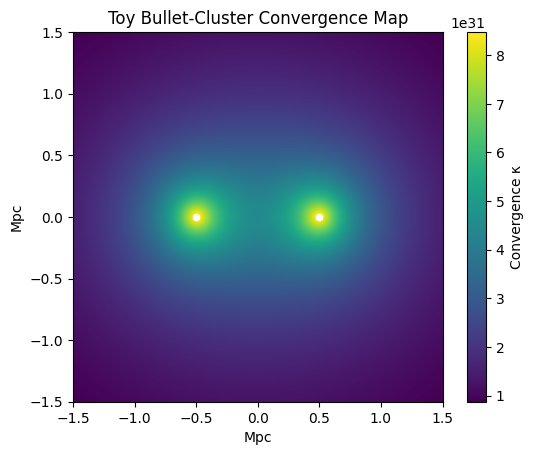

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 1.0                # separation in Mpc
rs = 0.3               # scale radius
S0 = 1e57              # typical bit amplitude
Gamma = 1e-16          # kg/bit
G = 6.674e-11
c = 3e8
Sigma_crit = 1e9       # critical surface density placeholder

# Grid in Mpc
n = 200
x = np.linspace(-1.5,1.5,n)
y = np.linspace(-1.5,1.5,n)
X,Y = np.meshgrid(x,y)

def Sigma_ent(x,y,xc):
    r = np.sqrt((x-xc)**2 + y**2)
    Ment = Gamma*S0*(np.log(1+r/rs) - r/(r+rs))
    # assume thin lens: project Ment/R_vir over some thickness h
    h = 0.5
    return Ment/(np.pi*(r+1e-3)**2)*h

# Two centers
Sig = Sigma_ent(X,Y, d/2) + Sigma_ent(X,Y,-d/2)
kappa = Sig/Sigma_crit

plt.imshow(kappa, origin='lower', extent=[-1.5,1.5,-1.5,1.5])
plt.colorbar(label='Convergence κ')
plt.scatter([d/2,-d/2],[0,0], c='white', s=20)
plt.title('Toy Bullet‑Cluster Convergence Map')
plt.xlabel('Mpc'); plt.ylabel('Mpc')
plt.show()
